<div style="text-align: center; color:aquamarine">
  <h2>Main Objective</h2>
</div>
  <p>The increasing importance of thermal comfort in energy-efficient building management systems, particularly for creating optimal environments that balance energy consumption and user comfort. In this project we will develop a machine learning model to predict the thermal preferences of individuals based on environmental variables like air temperature, humidity, and personal characteristics such as age, sex, and activity level.</p>

<div style="text-align: center; color:aquamarine">
  <h2>Importing Libraries</h2>
</div>
  <p>The following section of the code is responsible for importing the necessary libraries and modules required for the program to function. These imports may include standard Python libraries, third-party packages, or custom modules. Each import statement ensures that the corresponding library or module is available for use within the code, providing access to various functions, classes, and methods that facilitate the implementation of the program's functionality.</p>

In [2]:
# Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    cross_val_score,
    GridSearchCV,
    RandomizedSearchCV,
)
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
)
from sklearn.ensemble import (
    RandomForestClassifier,
    VotingClassifier,
    StackingClassifier,
)
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction import FeatureHasher
from sklearn.svm import SVC
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
)
from imblearn.over_sampling import SMOTE

<div style="text-align: center; color:aquamarine">
  <h2>Loading Dataset</h2>
  <h2>The ASHRAE Global Thermal Comfort Database II</h2>
</div>
  <p>The ASHRAE Global Thermal Comfort Database II was launched in 2014 under the leadership of the University of California, Berkeley’s Center for the Built Environment and The University of Sydney’s Indoor Environmental Quality (IEQ) Laboratory. The database is a significant open-source research initiative aimed at advancing the study of HVAC (Heating, Ventilation, and Air Conditioning) systems and thermal comfort.</p>

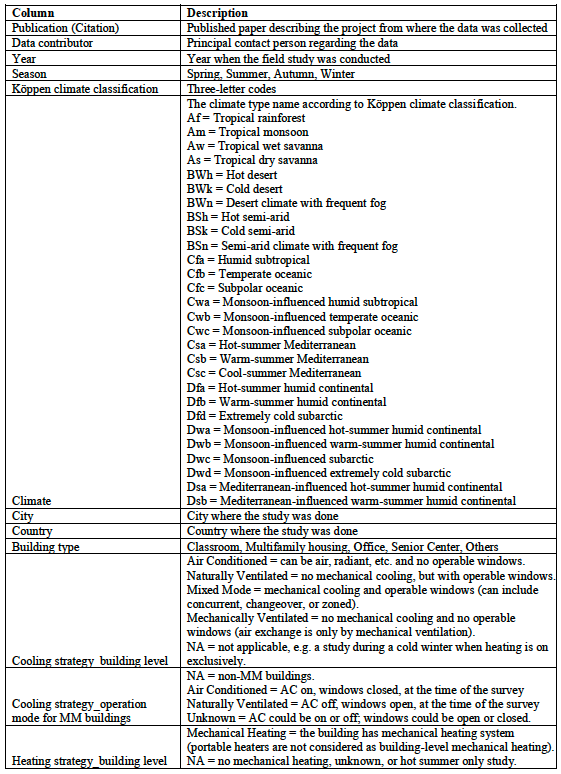
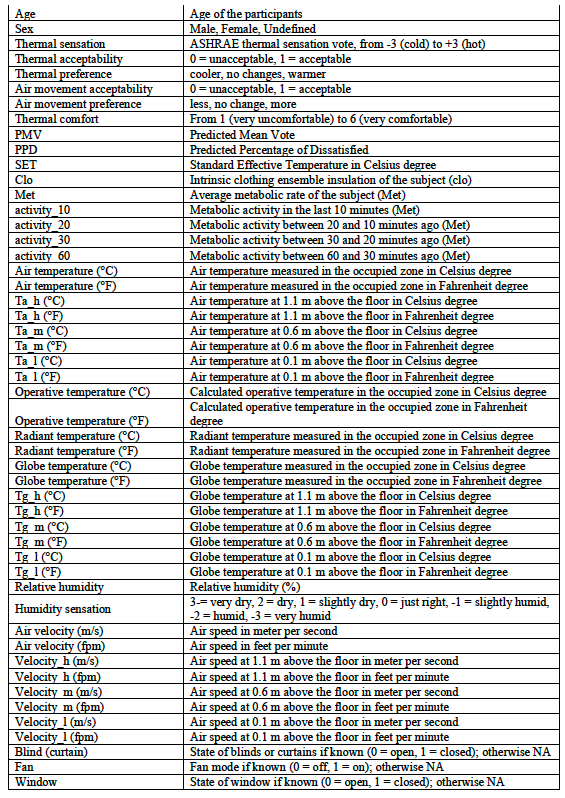
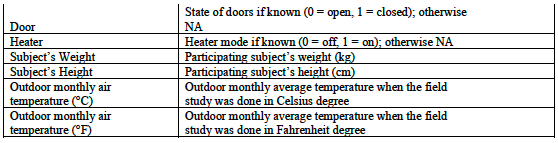

Dataset Link: [The ASHRAE Global Thermal Comfort Database II](https://www.kaggle.com/datasets/claytonmiller/ashrae-global-thermal-comfort-database-ii)

In [3]:
# Load the raw dataset
file_path = "ashrae_db2.01.csv"
raw_df = pd.read_csv(file_path)

# Inspect the dataset
print("Dataset Shape:", raw_df.shape)
raw_df.head()

Dataset Shape: (107583, 70)


C:\Users\sakif\AppData\Local\Temp\ipykernel_80036\3650282357.py:3: DtypeWarning: Columns (10,11,13,18,19,34,50) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_df = pd.read_csv(file_path)


Publication (Citation) Data contributor    Year  \
0  Kwok, Alison G., and Chungyoon Chun. "Thermal ...      Kwok Alison  2000.0   
1  Kwok, Alison G., and Chungyoon Chun. "Thermal ...      Kwok Alison  2000.0   
2  Kwok, Alison G., and Chungyoon Chun. "Thermal ...      Kwok Alison  2000.0   
3  Kwok, Alison G., and Chungyoon Chun. "Thermal ...      Kwok Alison  2000.0   
4  Kwok, Alison G., and Chungyoon Chun. "Thermal ...      Kwok Alison  2000.0   

   Season Koppen climate classification            Climate   City Country  \
0  Summer                           Cfa  Humid subtropical  Tokyo   Japan   
1  Summer                           Cfa  Humid subtropical  Tokyo   Japan   
2  Summer                           Cfa  Humid subtropical  Tokyo   Japan   
3  Summer                           Cfa  Humid subtropical  Tokyo   Japan   
4  Summer                           Cfa  Humid subtropical  Tokyo   Japan   

  Building type Cooling startegy_building level  ... Subject«s height (cm)  \
0     Classroom                 Air Conditioned  ...                 162.0   
1     Classroom                 Air Conditioned  ...                 154.0   
2     Classroom                 Air Conditioned  ...                 173.0   
3     Classroom                 Air Conditioned  ...                 167.0   
4     Classroom                 Air Conditioned  ...                 178.0   

  Subject«s weight (kg)  Blind (curtain) Fan  Window  Door Heater  \
0                   NaN              NaN NaN     NaN   NaN    NaN   
1                   NaN              NaN NaN     NaN   NaN    NaN   
2                   NaN              NaN NaN     NaN   NaN    NaN   
3                   NaN              NaN NaN     NaN   NaN    NaN   
4                   NaN              NaN NaN     NaN   NaN    NaN   

   Outdoor monthly air temperature (C) Outdoor monthly air temperature (F)  \
0                                 25.0                                77.0   
1                                 25.0                                77.0   
2                                 25.0                                77.0   
3                                 25.0                                77.0   
4                                 25.0                                77.0   

     Database  
0  Database 2  
1  Database 2  
2  Database 2  
3  Database 2  
4  Database 2  

[5 rows x 70 columns]

<div style="text-align: center; color:aquamarine">
  <h2>Exploratory Data Analysis</h2>
</div>
  <p>The following section of the code is responsible for performing Exploratory Data Analysis (EDA) on the dataset. EDA is a crucial step in the data analysis process, as it helps to understand the underlying patterns, relationships, and anomalies in the data. This section includes various techniques such as data visualization, summary statistics, and correlation analysis to gain insights into the dataset and guide further data preprocessing and modeling steps.</p>

In [4]:
# loc[] is primarily label based filtering method, to access a group of rows and columns by label
df = raw_df.loc[:, raw_df.isna().mean() < 0.67]

In [5]:
df.shape

(107583, 35)

In [6]:
df.columns

Index(['Publication (Citation)', 'Data contributor', 'Year', 'Season',
       'Koppen climate classification', 'Climate', 'City', 'Country',
       'Building type', 'Cooling startegy_building level',
       'Heating strategy_building level', 'Age', 'Sex', 'Thermal sensation',
       'Thermal sensation acceptability', 'Thermal preference',
       'Air movement preference', 'Thermal comfort', 'PMV', 'PPD', 'SET',
       'Clo', 'Met', 'Air temperature (C)', 'Air temperature (F)',
       'Operative temperature (C)', 'Operative temperature (F)', 'Tg_h (C)',
       'Tg_h (F)', 'Relative humidity (%)', 'Air velocity (m/s)',
       'Air velocity (fpm)', 'Outdoor monthly air temperature (C)',
       'Outdoor monthly air temperature (F)', 'Database'],
      dtype='object')

In [7]:
df.isnull().sum()

Publication (Citation)                  1655
Data contributor                           0
Year                                     248
Season                                   241
Koppen climate classification              0
Climate                                    0
City                                      13
Country                                    0
Building type                           4199
Cooling startegy_building level         1227
Heating strategy_building level        69818
Age                                    64004
Sex                                    40548
Thermal sensation                       3129
Thermal sensation acceptability        45139
Thermal preference                     22083
Air movement preference                64208
Thermal comfort                        71248
PMV                                    40849
PPD                                    40849
SET                                    41065
Clo                                     7920
Met       

In [8]:
df.dtypes

Publication (Citation)                  object
Data contributor                        object
Year                                   float64
Season                                  object
Koppen climate classification           object
Climate                                 object
City                                    object
Country                                 object
Building type                           object
Cooling startegy_building level         object
Heating strategy_building level         object
Age                                    float64
Sex                                     object
Thermal sensation                      float64
Thermal sensation acceptability        float64
Thermal preference                      object
Air movement preference                 object
Thermal comfort                         object
PMV                                    float64
PPD                                    float64
SET                                    float64
Clo          

<div style="text-align: center; color:aquamarine">
  <h2>Data Preprocessing</h2>
</div>
  <p>The following section of the code is responsible for pre-processing the dataset. This includes handling missing values, dropping irrelevant or sparse columns, renaming columns for better readability, and capping outliers. These steps ensure that the dataset is clean and ready for further analysis and modeling.</p>

In [9]:
# Step 1: Inspect missing data to identify sparse columns
missing_data_summary = df.isnull().sum() / len(df) * 100
print("Percentage of missing values:\n", missing_data_summary)

# Step 2: Define columns to drop
columns_to_drop = [
    "Publication (Citation)",  # Metadata
    "Data contributor",  # Metadata
    # "Year",  # May not directly affect thermal comfort
    "Air temperature (F)",  # Duplicate with 'Air temperature (C)'
    # "Relative humidity (%)",  # Example: Keep or drop depending on focus
    "Cooling startegy_operation mode for MM buildings",  # Sparse
    "Heating strategy_building level",  # Sparse
    "activity_10",
    "activity_20",
    "activity_30",
    "activity_60",  # Sparse
    "PMV",
    "PPD",
    # "SET",
    # "MET",  # Sparse
    "Ta_h (C)",
    "Ta_h (F)",
    "Ta_m (C)",
    "Ta_m (F)",
    "Ta_l (C)",
    "Ta_l (F)",
    # "Operative temperature (C)",
    "Operative temperature (F)",
    "Radiant temperature (C)",
    "Radiant temperature (F)",
    "Globe temperature (F)",
    "Tg_h (C)",
    "Tg_h (F)",
    "Tg_m (C)",
    "Tg_m (F)",
    "Tg_l (C)",
    "Tg_l (F)",
    "Humidity preference",
    "Humidity sensation",
    "Air velocity (fpm)",
    "Velocity_h (m/s)",
    "Velocity_h (fpm)",
    "Velocity_m (m/s)",
    "Velocity_m (fpm)",
    "Velocity_l (m/s)",
    "Velocity_l (fpm)",
    "Blind (curtain)",
    "Fan",
    "Window",
    "Door",
    "Heater",  # Sparse
    "Outdoor monthly air temperature (F)",
    "Database",
    # Sparse
]

# Step 3: Drop the columns
simplified_dataset = df.drop(columns=columns_to_drop, errors="ignore")

# Display the updated dataset shape and columns
print("Updated Dataset Shape:", simplified_dataset.shape)
print("Updated Columns:\n", simplified_dataset.columns)

Percentage of missing values:
 Publication (Citation)                  1.538347
Data contributor                        0.000000
Year                                    0.230520
Season                                  0.224013
Koppen climate classification           0.000000
Climate                                 0.000000
City                                    0.012084
Country                                 0.000000
Building type                           3.903033
Cooling startegy_building level         1.140515
Heating strategy_building level        64.896870
Age                                    59.492671
Sex                                    37.689970
Thermal sensation                       2.908452
Thermal sensation acceptability        41.957372
Thermal preference                     20.526477
Air movement preference                59.682292
Thermal comfort                        66.226077
PMV                                    37.969754
PPD                                   

### Columns to Consider Dropping:

1. **High Missing Values (>50%):**
   - `Air movement acceptability` (84.81% missing)
   - `Subject«s height (cm)` (81.08% missing)
   - `Subject«s weight (kg)` (77.08% missing)
   - `Globe temperature (C)` (75.83% missing)

2. **Columns with Missing Values Between 20-50% (Optional):**
   - These columns have a moderate level of missing data and can be retained or dropped based on their importance:
     - `Sex` (37.69% missing): Important for personalization but sparse.
     - `Thermal sensation acceptability` (41.96% missing): Consider based on its relevance to thermal comfort.
     - `Thermal preference` (20.53% missing): Useful for comfort analysis but sparse.

3. **Columns with Relatively Lower Missing Data (<20%):**
   - These columns have low percentages of missing values and can be imputed:
     - `Age` (59.49% missing): High but potentially critical for demographic insights. Consider imputing if relevant.
     - `Met` (15.95% missing): Can be imputed with median or mean.
     - `Air velocity (m/s)` (16.44% missing): Critical for air movement and comfort analysis; impute missing values.
     - `Outdoor monthly air temperature (C)` (26.25% missing): Impute to retain climate-related information.
     - `Air temperature (C)` (7.13% missing): Retain and impute missing values, as temperature is a key variable.

---

### Justification for Decisions:

1. **High Missing Values (>50%):**
   - Columns with over 50% missing data are unreliable for analysis and should generally be dropped unless they are critical to the research.

2. **Moderate Missing Values (20-50%):**
   - Columns like `Sex`, `Thermal sensation acceptability`, and `Thermal preference` should be retained only if they are critical to the research objectives. Otherwise, they can be dropped or imputed with caution.

3. **Low Missing Values (<20%):**
   - Columns with low missing values should be imputed to retain their information. Techniques like median, mean, or mode imputation can be used depending on the data type and distribution.

4. **Final Decision:**
   - Drop columns with over 50% missing values and evaluate the significance of columns with 20-50% missing data. Impute missing values for columns with less than 20% missing data to maintain their utility in analysis.


In [10]:
# Define columns to drop based on missing values and relevance
columns_to_drop_further = [
    "Air movement acceptability",  # >80% missing
    "Globe temperature (C)",  # >75% missing
    # "Thermal comfort",  # >66% missing -- NOT DROPPING - Potential Target Variable
    # "Subject«s height (cm)",  # >81% missing -- NOT DROPPING - Important Personal Feature
    # "Subject«s weight (kg)",  # >77% missing -- NOT DROPPING - Important Personal Feature
]

# Drop the additional columns
simplified_dataset = simplified_dataset.drop(
    columns=columns_to_drop_further, errors="ignore"
)

# Check the updated dataset shape and columns
print("Updated Dataset Shape:", simplified_dataset.shape)
print("Updated Columns:\n", simplified_dataset.columns)

Updated Dataset Shape: (107583, 23)
Updated Columns:
 Index(['Year', 'Season', 'Koppen climate classification', 'Climate', 'City',
       'Country', 'Building type', 'Cooling startegy_building level', 'Age',
       'Sex', 'Thermal sensation', 'Thermal sensation acceptability',
       'Thermal preference', 'Air movement preference', 'Thermal comfort',
       'SET', 'Clo', 'Met', 'Air temperature (C)', 'Operative temperature (C)',
       'Relative humidity (%)', 'Air velocity (m/s)',
       'Outdoor monthly air temperature (C)'],
      dtype='object')


In [11]:
# Statistical summary of numerical features
print("\nStatistical Summary:\n", simplified_dataset.describe())


Statistical Summary:
                 Year           Age  Thermal sensation  \
count  107335.000000  43579.000000      104454.000000   
mean     2002.010695     32.560173           0.167892   
std         8.821613     14.094305           1.241041   
min      1979.000000      6.000000          -3.000000   
25%      1995.000000     21.000000          -0.500000   
50%      1999.000000     29.000000           0.000000   
75%      2011.000000     43.000000           1.000000   
max      2016.000000     99.000000           3.000000   

       Thermal sensation acceptability           SET           Clo  \
count                     62444.000000  66518.000000  99663.000000   
mean                          0.775078     25.769629      0.673669   
std                           0.417534      3.201344      0.287622   
min                           0.000000      6.550000      0.000000   
25%                           1.000000     23.710000      0.490000   
50%                           1.000000     

In [12]:
simplified_dataset.isnull().sum()

Year                                     248
Season                                   241
Koppen climate classification              0
Climate                                    0
City                                      13
Country                                    0
Building type                           4199
Cooling startegy_building level         1227
Age                                    64004
Sex                                    40548
Thermal sensation                       3129
Thermal sensation acceptability        45139
Thermal preference                     22083
Air movement preference                64208
Thermal comfort                        71248
SET                                    41065
Clo                                     7920
Met                                    17164
Air temperature (C)                     7672
Operative temperature (C)              69620
Relative humidity (%)                   9821
Air velocity (m/s)                     17691
Outdoor mo

In [13]:
# Define a dictionary with the current column names as keys and new names as values
rename_columns = {
    "Year": "year",
    "Season": "season",
    "Koppen climate classification": "koppen_climate",
    "Climate": "climate_description",
    "City": "city",
    "Country": "country",
    "Building type": "building_type",
    "Cooling startegy_building level": "cooling_strategy",
    # "Heating strategy_building level": "heating_strategy",
    "Age": "age",
    "Sex": "sex",
    "Thermal sensation": "thermal_sensation",
    "Thermal sensation acceptability": "thermal_sensation_acceptability",
    "Thermal preference": "thermal_preference",
    "Air movement preference": "air_movement_preference",
    "Thermal comfort": "thermal_comfort",
    "SET": "standard_effective_temperature",
    "Clo": "clothing_insulation",
    "Met": "metabolic_rate",
    "Air temperature (C)": "air_temperature",
    "Operative temperature (C)": "operative_temperature",
    "Radiant temperature (C)": "radiant_temperature",
    "Relative humidity (%)": "relative_humidity",
    "Humidity preference": "humidity_preference",
    "Humidity sensation": "humidity_sensation",
    "Subject«s height (cm)": "subject_height",
    "Subject«s weight (kg)": "subject_weight",
    "Air velocity (m/s)": "air_velocity",
    "Outdoor monthly air temperature (C)": "outdoor_air_temperature",
}

# Rename the columns
simplified_dataset.rename(columns=rename_columns, inplace=True)

# Display the updated column names
print("Updated Column Names:\n", simplified_dataset.columns)

Updated Column Names:
 Index(['year', 'season', 'koppen_climate', 'climate_description', 'city',
       'country', 'building_type', 'cooling_strategy', 'age', 'sex',
       'thermal_sensation', 'thermal_sensation_acceptability',
       'thermal_preference', 'air_movement_preference', 'thermal_comfort',
       'standard_effective_temperature', 'clothing_insulation',
       'metabolic_rate', 'air_temperature', 'operative_temperature',
       'relative_humidity', 'air_velocity', 'outdoor_air_temperature'],
      dtype='object')


In [14]:
# Export the sampled dataframe to a CSV file
simplified_dataset.to_csv("simplified_ashrae_data.csv", index=False)

In [15]:
# Identify categorical columns
categorical_cols = simplified_dataset.select_dtypes(include=["object"]).columns

# Display unique values and their count for each categorical column
for col in categorical_cols:
    unique_values = simplified_dataset[col].unique()
    print(f"Column: '{col}'")
    print(f"Number of Unique Values: {len(unique_values)}")
    print(f"Unique Values: {unique_values}")
    print("-" * 50)

Column: 'season'
Number of Unique Values: 5
Unique Values: ['Summer' 'Autumn' 'Winter' 'Spring' nan]
--------------------------------------------------
Column: 'koppen_climate'
Number of Unique Values: 16
Unique Values: ['Cfa' 'Csb' 'Aw' 'BSh' 'Csa' 'Csc' 'Dwa' 'Af' 'Cfb' 'BWh' 'BSk' 'Am' 'As'
 'Cwa' 'Cwb' 'Dfb']
--------------------------------------------------
Column: 'climate_description'
Number of Unique Values: 19
Unique Values: ['Humid subtropical' 'Warm-summer Mediterranean' 'Tropical wet savanna'
 'Hot semi-arid' 'Hot-summer Mediterranean' 'Cool-summer Mediterranean'
 'Monsoon-influenced hot-summer humid continental' 'Tropical rainforest'
 'Temperate oceanic' 'Hot desert' 'Cold semi-arid' 'Tropical monsoon'
 'Tropical dry savanna' 'Monsoon-influenced humid subtropical'
 'Subtropical highland' 'Warm-summer humid continental'
 'Cool-summer mediterranean' 'Oceanic' 'Hot-summer mediterranean']
--------------------------------------------------
Column: 'city'
Number of Unique Value

### Our Target Variable is thermal_preference. So, we are dropping all the rows where thermal_preference is missing.

In [16]:
# Drop rows where 'thermal_preference' is null
simplified_dataset = simplified_dataset.dropna(subset=["thermal_preference"])

In [17]:
# Convert 'thermal_comfort' to float
simplified_dataset["thermal_comfort"] = pd.to_numeric(
    simplified_dataset["thermal_comfort"], errors="coerce"
)

# Verify the conversion
print(simplified_dataset["thermal_comfort"].dtype)
print(simplified_dataset["thermal_comfort"].head())

float64
0    5.0
1    5.0
2    6.0
3    4.0
4    6.0
Name: thermal_comfort, dtype: float64



Percentage of Missing Values:
 year                                0.000000
season                              0.169591
koppen_climate                      0.000000
climate_description                 0.000000
city                                0.015205
country                             0.000000
building_type                       4.901754
cooling_strategy                    0.768421
age                                53.160234
sex                                30.301754
thermal_sensation                   0.180117
thermal_sensation_acceptability    36.685380
thermal_preference                  0.000000
air_movement_preference            51.490058
thermal_comfort                    70.836257
standard_effective_temperature     34.329825
clothing_insulation                 3.991813
metabolic_rate                     10.504094
air_temperature                     8.394152
operative_temperature              66.326316
relative_humidity                   7.019883
air_velocity           

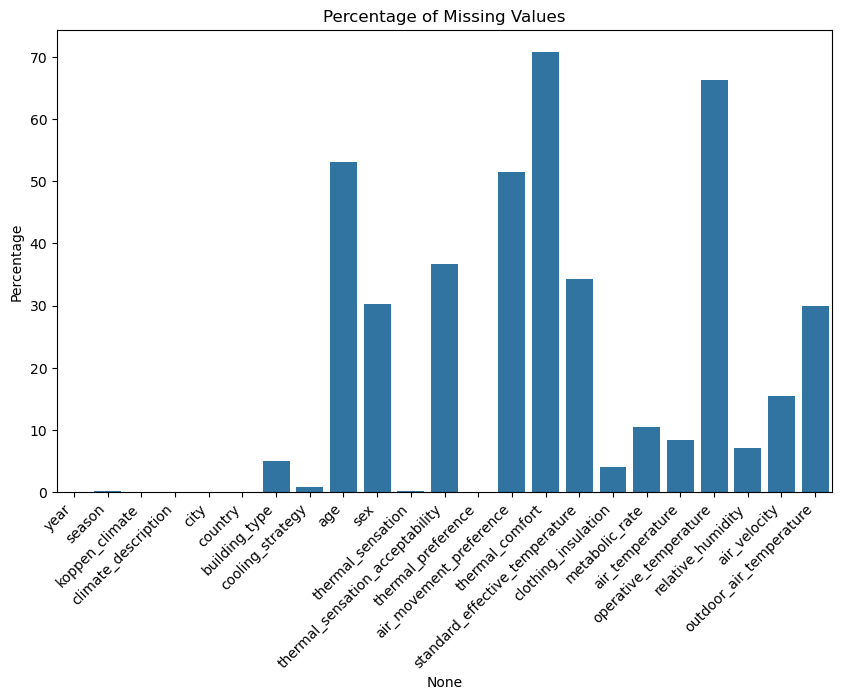

In [18]:
# Calculate percentage of missing values
missing_values = simplified_dataset.isnull().mean() * 100
print("\nPercentage of Missing Values:\n", missing_values)

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values)
plt.xticks(rotation=45, ha="right")
plt.title("Percentage of Missing Values")
plt.ylabel("Percentage")
plt.show()

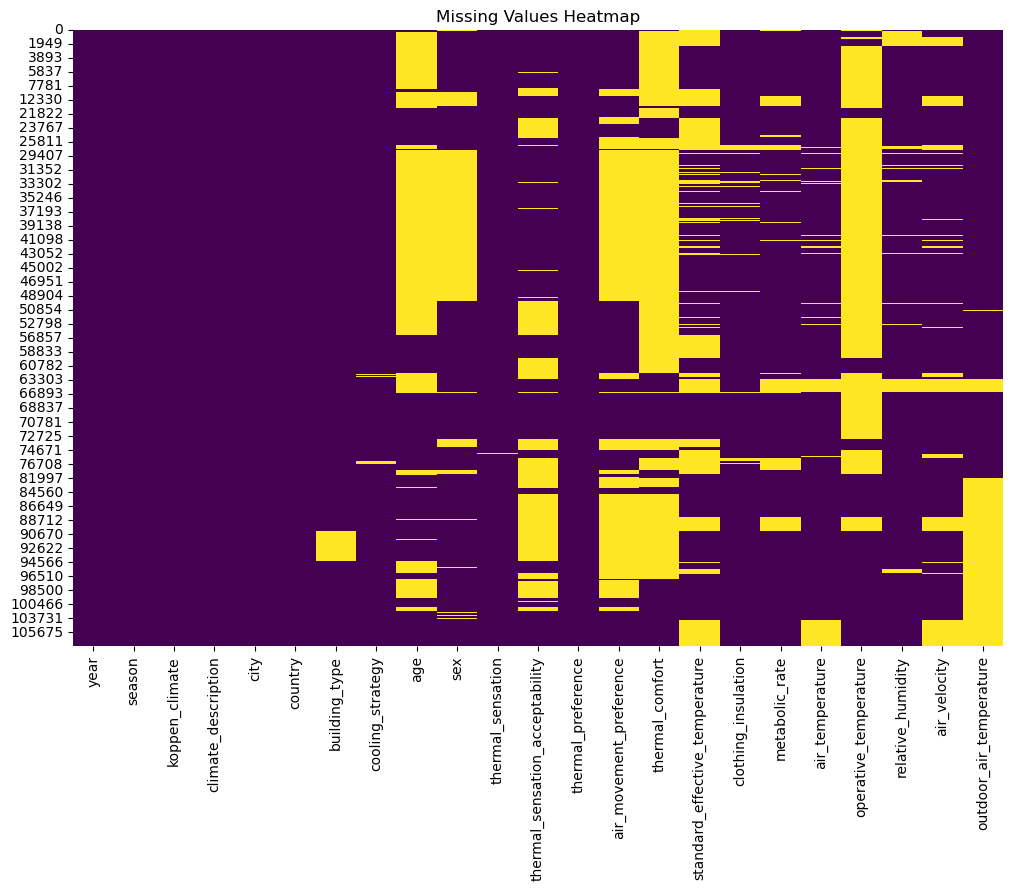

In [19]:
# Visualize missing values using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(simplified_dataset.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

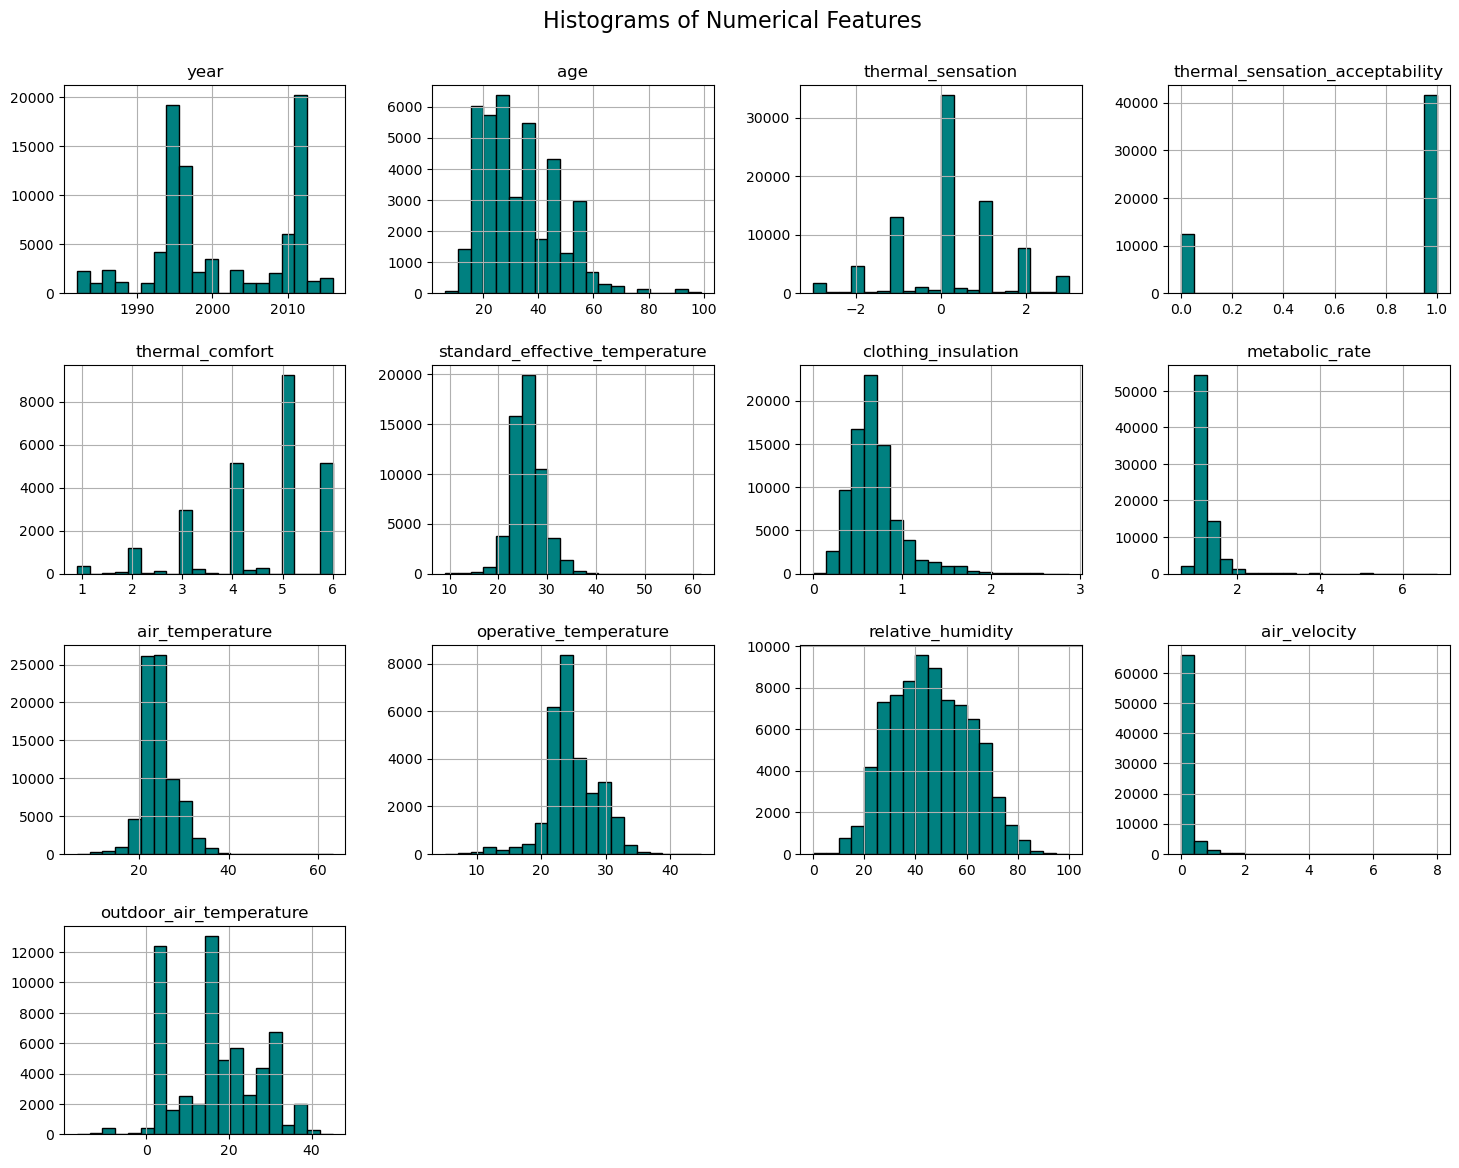

In [20]:
# Plot histograms for numerical features
simplified_dataset.select_dtypes(include=["float64", "Int64"]).hist(
    figsize=(15, 12), bins=20, color="teal", edgecolor="black"
)
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.tight_layout(pad=2.0)
plt.show()

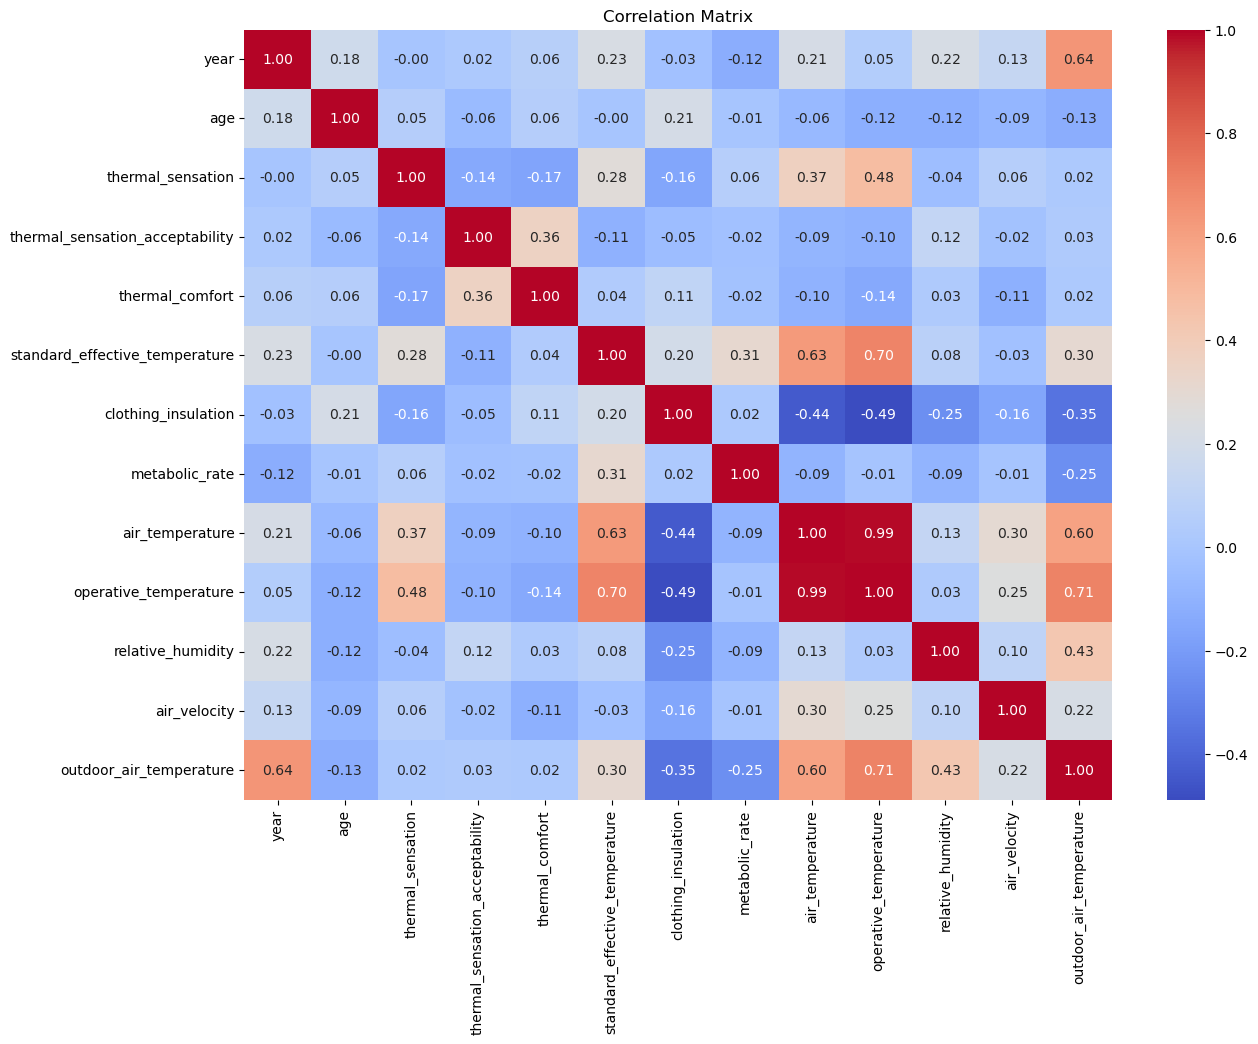

In [21]:
# Visualize the correlation matrix
numerical_cols = simplified_dataset.select_dtypes(include=["float64", "Int64"]).columns
correlation_matrix = simplified_dataset[numerical_cols].corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

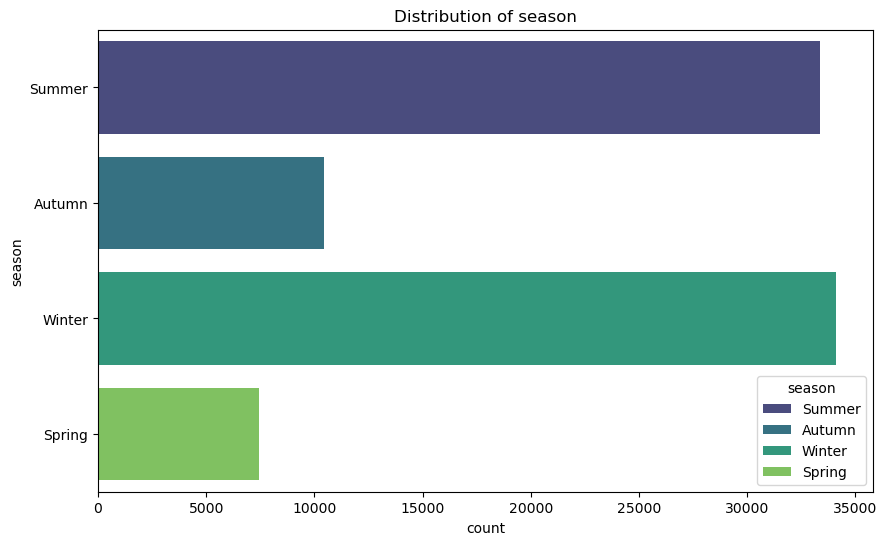

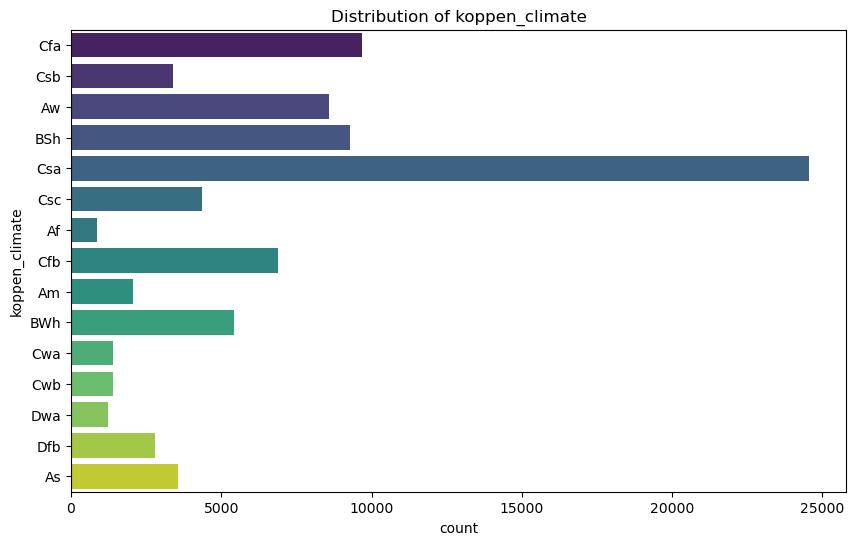

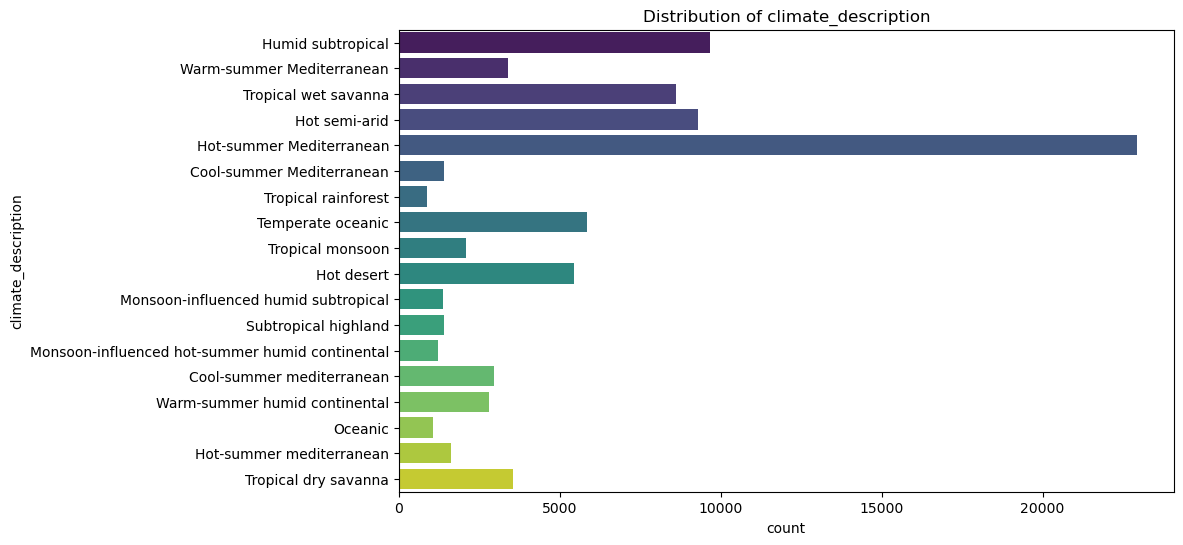

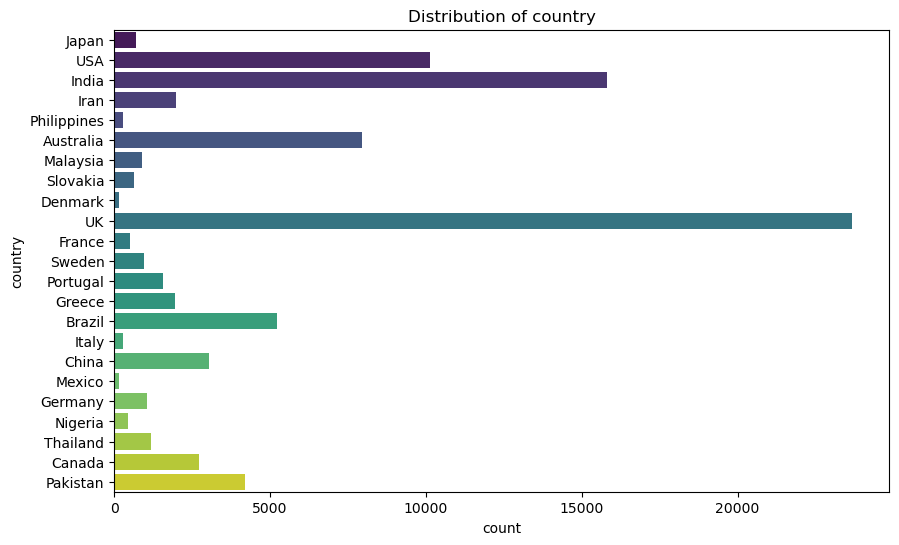

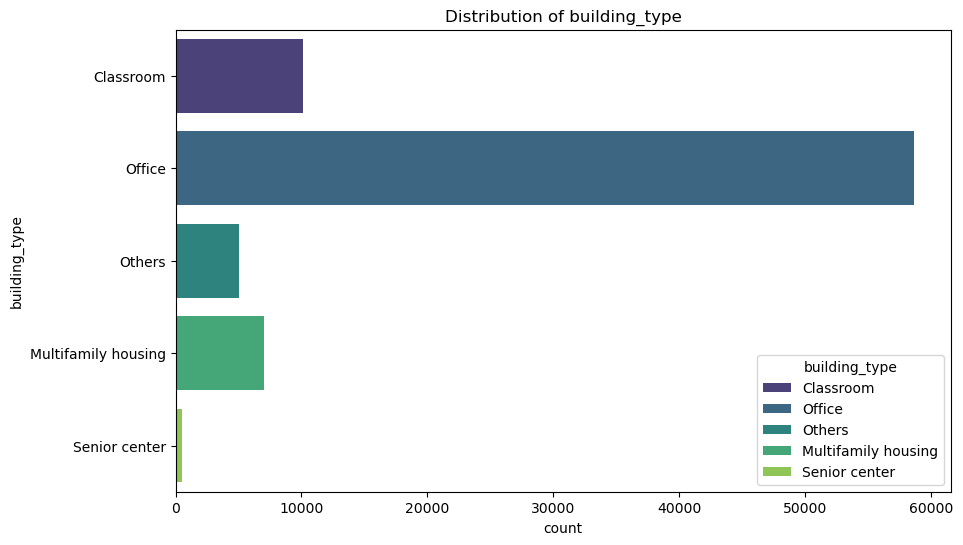

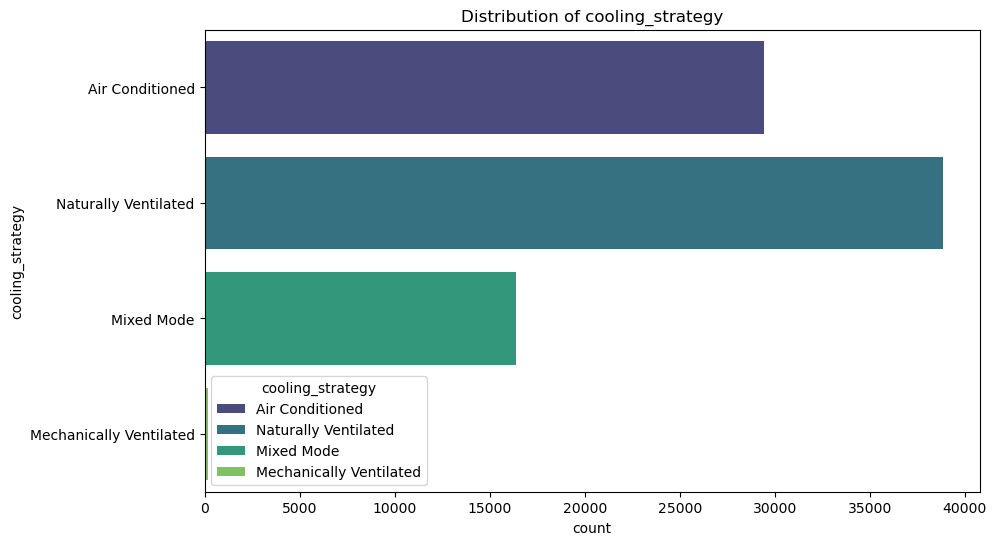

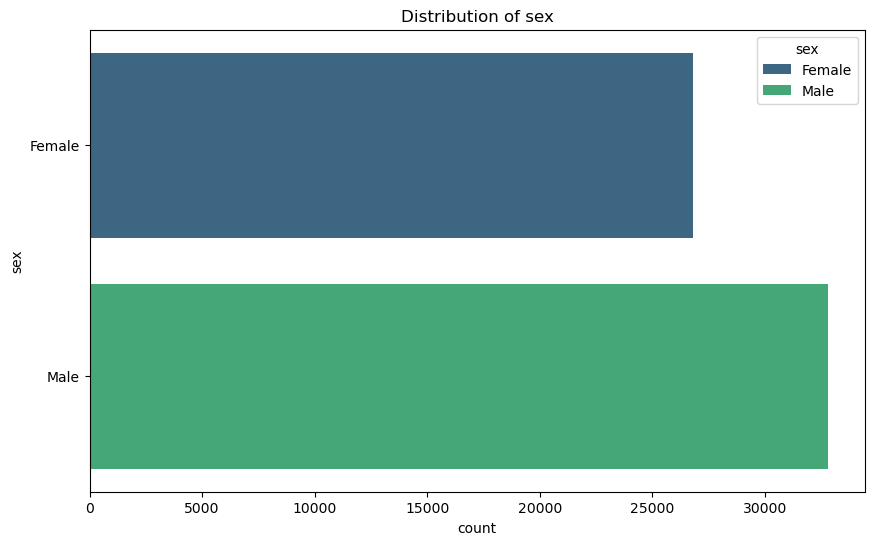

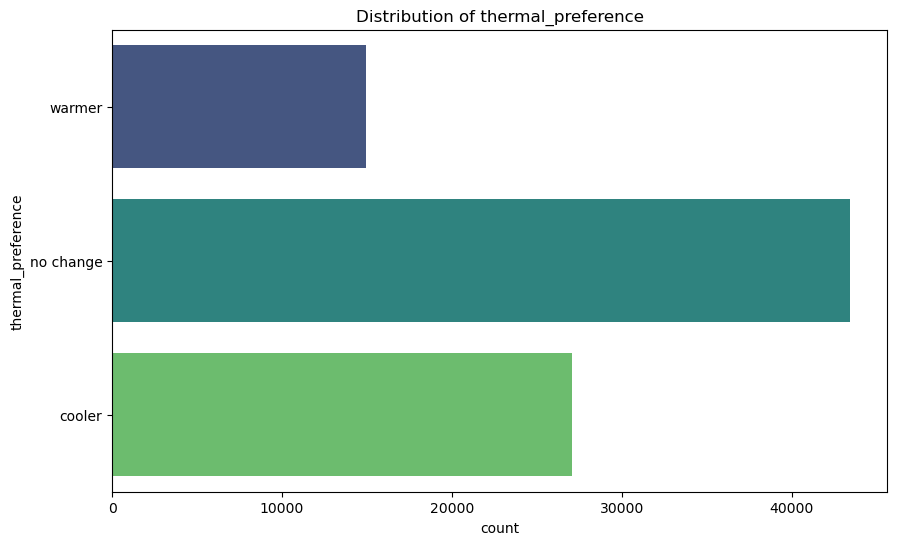

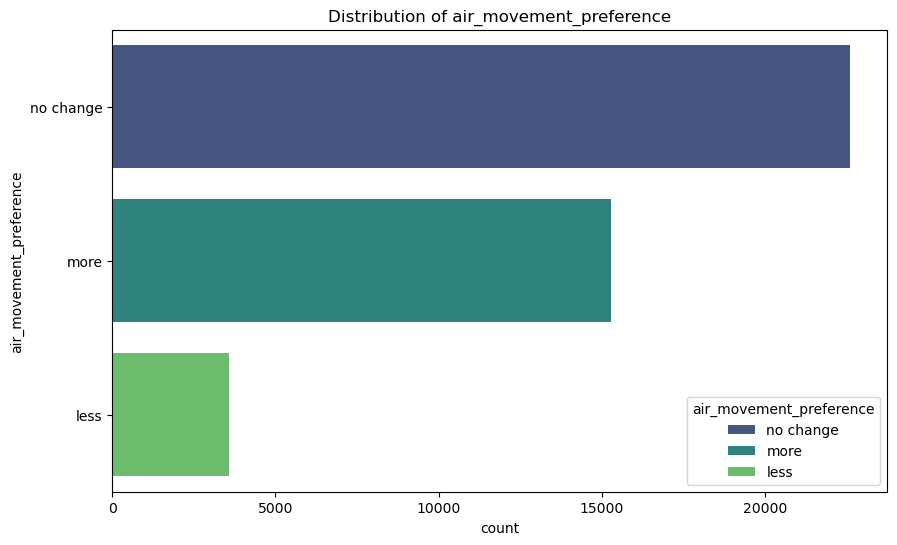

In [22]:
categorical_features = simplified_dataset.select_dtypes(include=["object"]).columns
for feature in categorical_features:
    if feature == "city":
        continue
    plt.figure(figsize=(10, 6))
    sns.countplot(data=simplified_dataset, y=feature, palette="viridis", hue=feature)
    plt.title(f"Distribution of {feature}")
    plt.show()

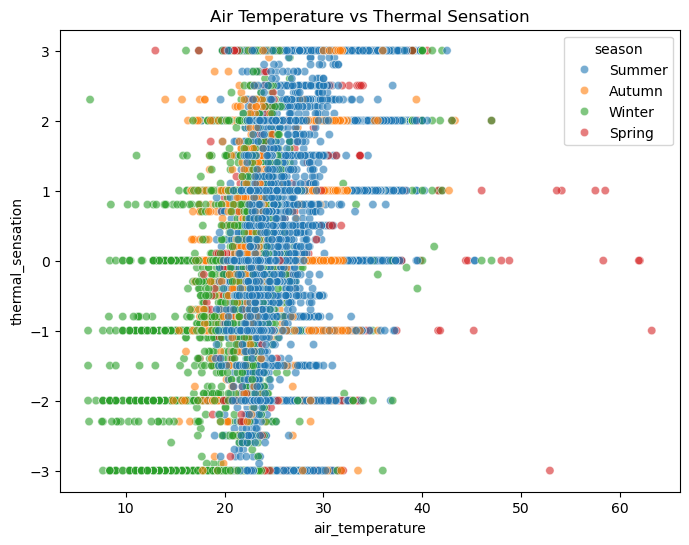

In [23]:
# Scatter plot for key relationships
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=simplified_dataset,
    x="air_temperature",
    y="thermal_sensation",
    hue="season",
    alpha=0.6,
)
plt.title("Air Temperature vs Thermal Sensation")
plt.show()

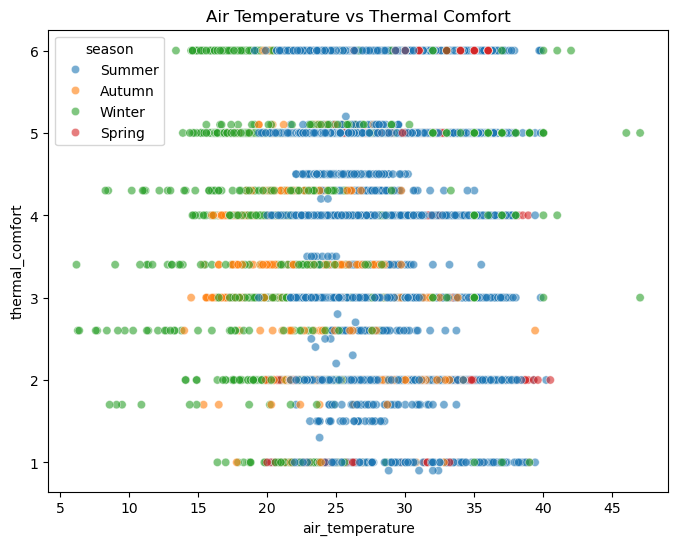

In [24]:
# Scatter plot for key relationships
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=simplified_dataset,
    x="air_temperature",
    y="thermal_comfort",
    hue="season",
    alpha=0.6,
)
plt.title("Air Temperature vs Thermal Comfort")
plt.show()

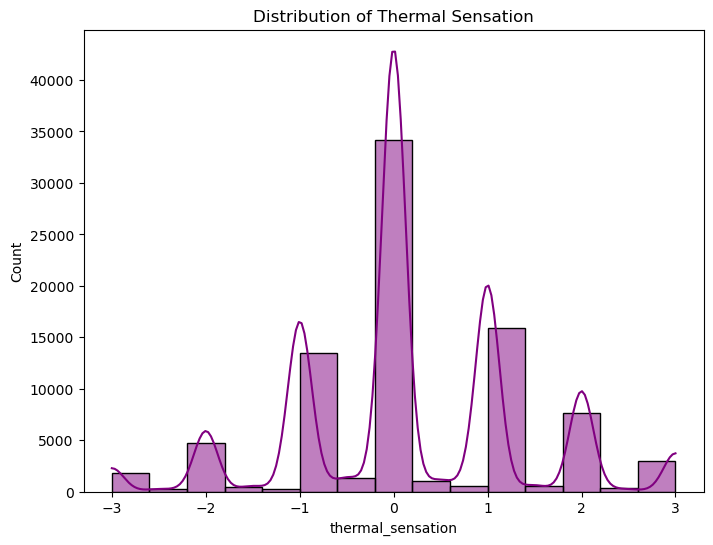

In [25]:
plt.figure(figsize=(8, 6))
sns.histplot(
    data=simplified_dataset, x="thermal_sensation", kde=True, bins=15, color="purple"
)
plt.title("Distribution of Thermal Sensation")
plt.show()

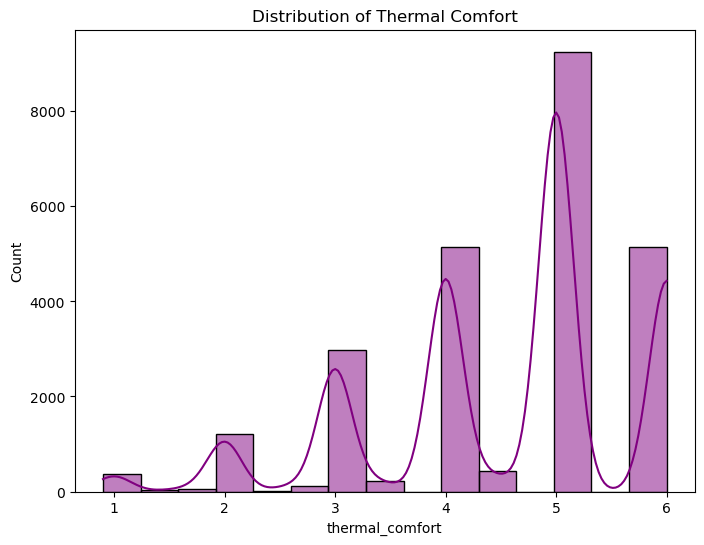

In [26]:
plt.figure(figsize=(8, 6))
sns.histplot(
    data=simplified_dataset, x="thermal_comfort", kde=True, bins=15, color="purple"
)
plt.title("Distribution of Thermal Comfort")
plt.show()

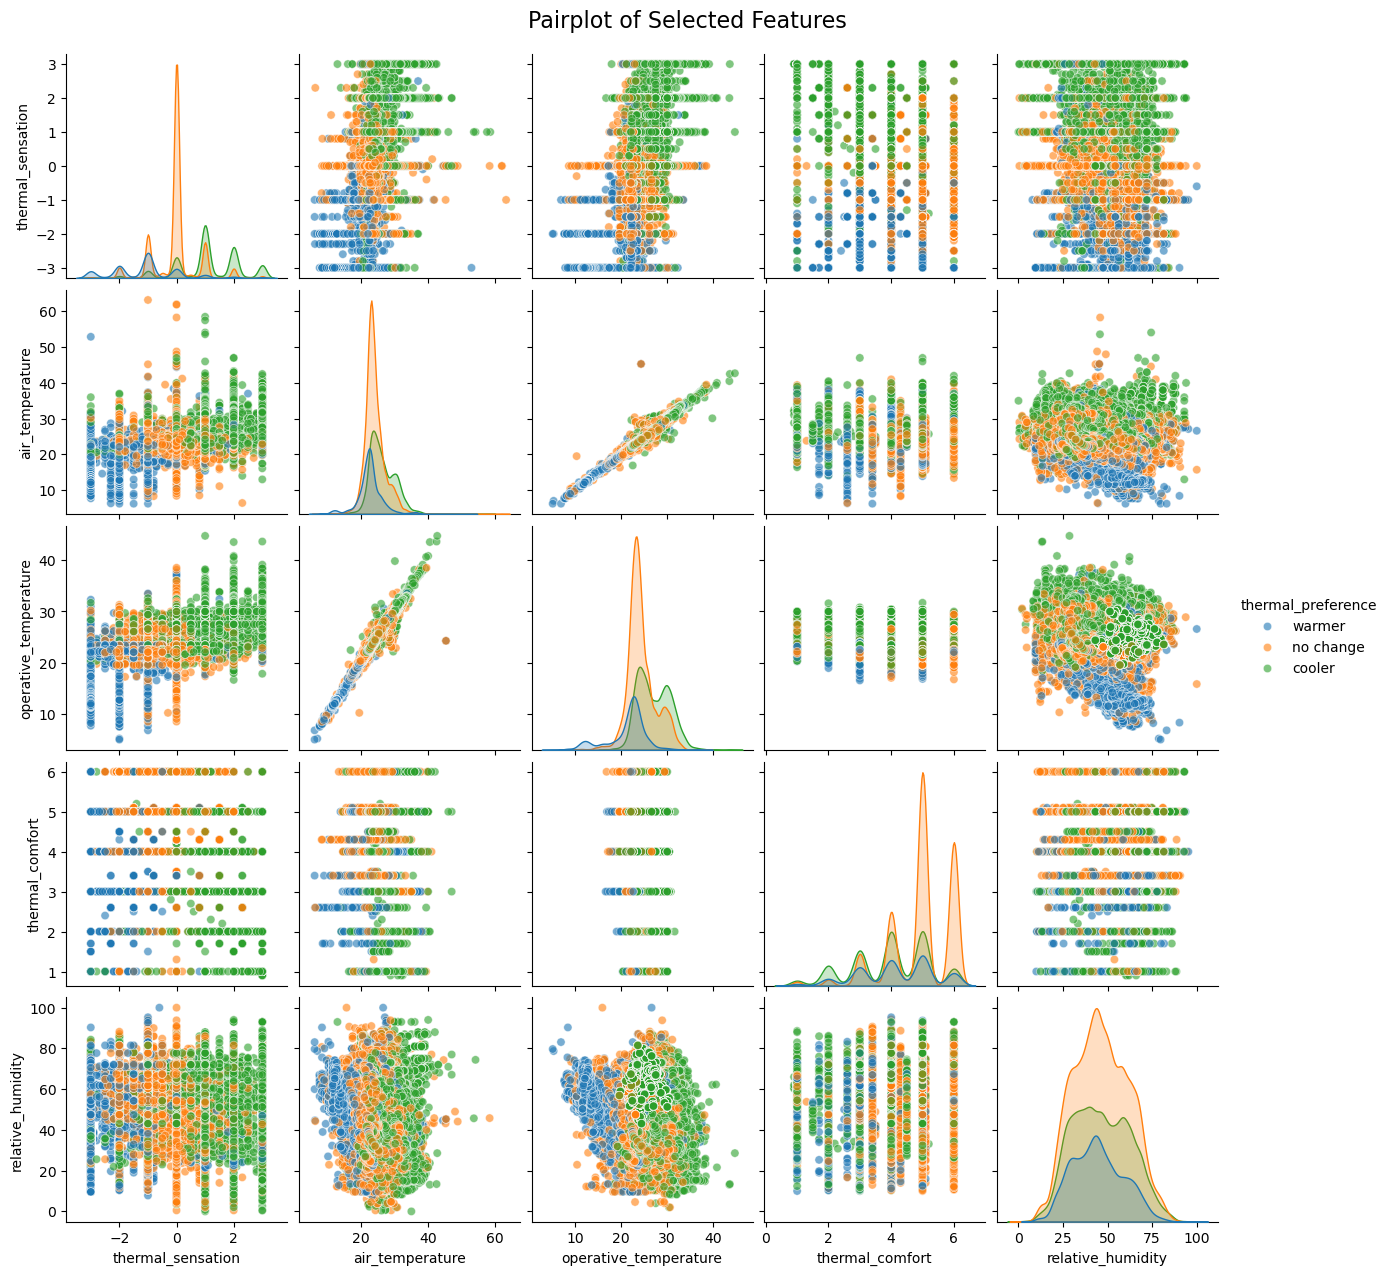

In [27]:
# Pairplot for selected features
selected_features = [
    "thermal_sensation",
    "air_temperature",
    "operative_temperature",
    # "humidity_sensation",
    "thermal_preference",
    "thermal_comfort",
    "relative_humidity",
]
sns.pairplot(
    simplified_dataset[selected_features],
    hue="thermal_preference",
    diag_kind="kde",
    plot_kws={"alpha": 0.6},
)
plt.suptitle("Pairplot of Selected Features", y=1.02, fontsize=16)
plt.show()

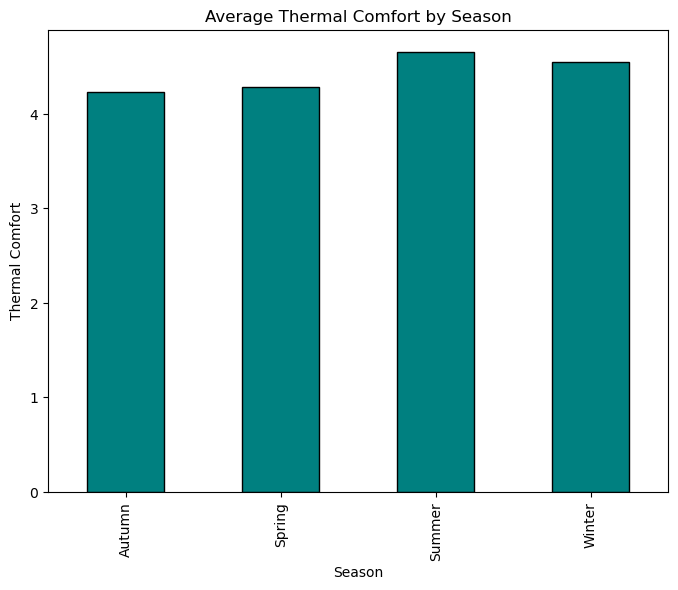

In [28]:
# Group by season to analyze trends
seasonal_means = simplified_dataset.groupby("season")["thermal_comfort"].mean()
seasonal_means.plot(kind="bar", figsize=(8, 6), color="teal", edgecolor="black")
plt.title("Average Thermal Comfort by Season")
plt.ylabel("Thermal Comfort")
plt.xlabel("Season")
plt.show()

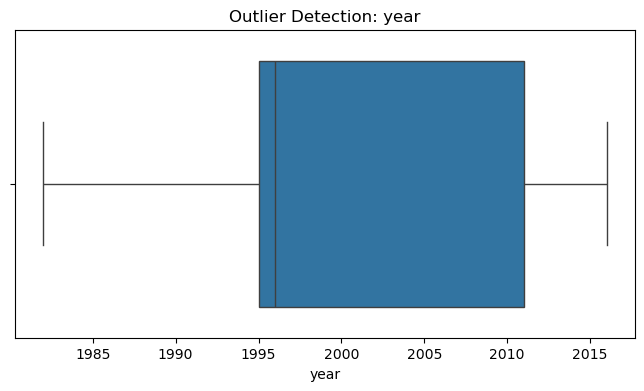

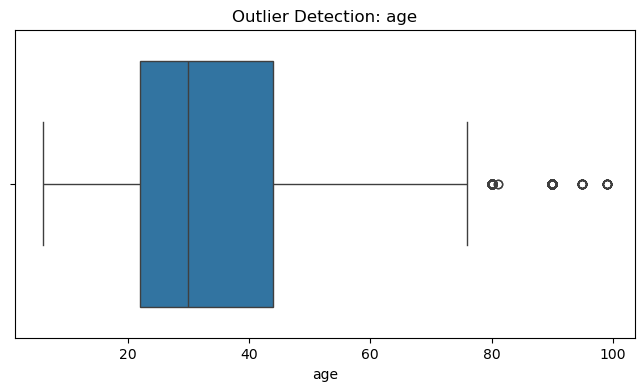

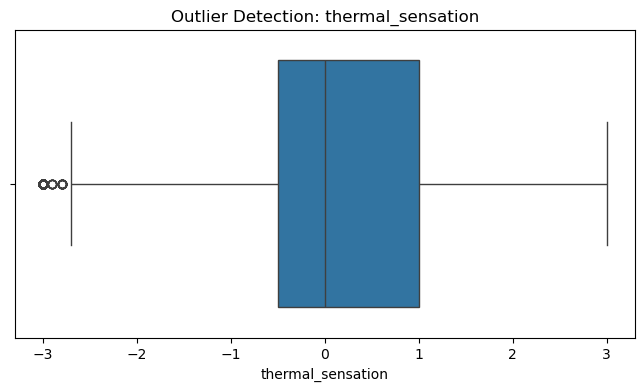

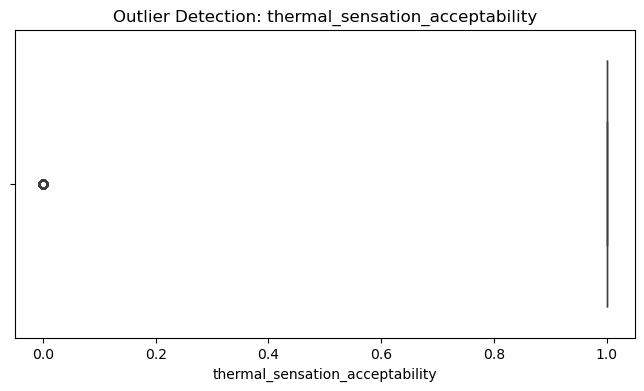

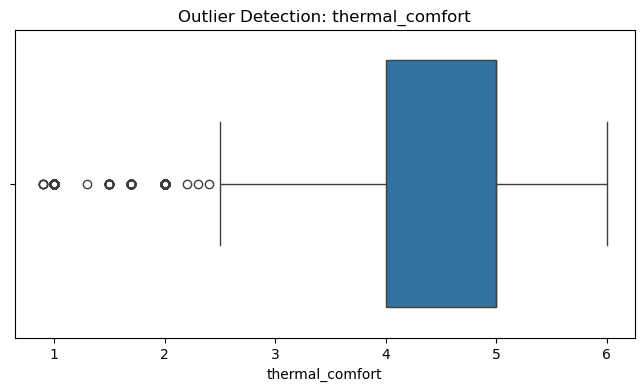

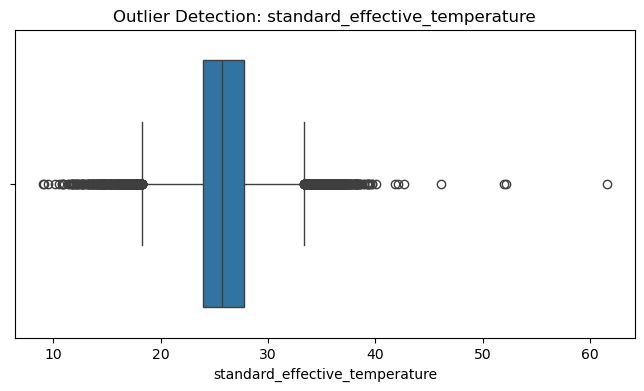

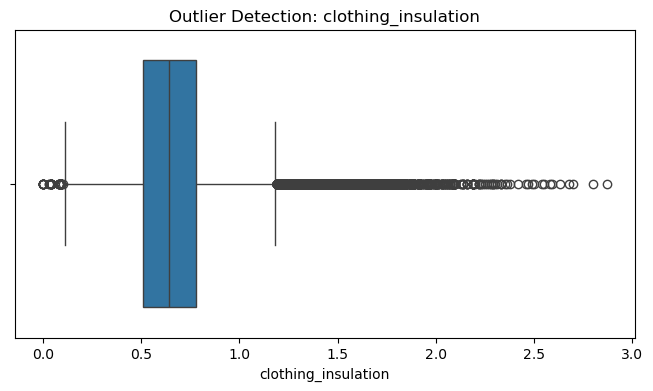

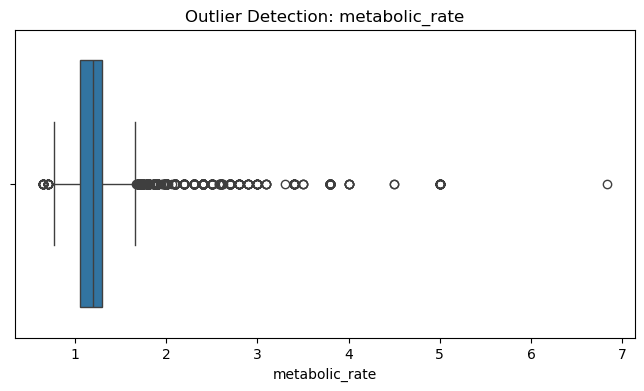

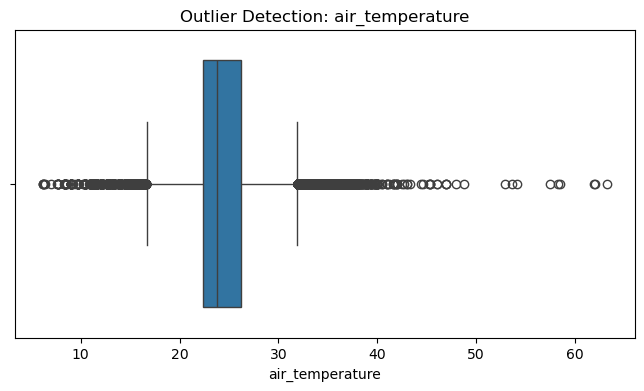

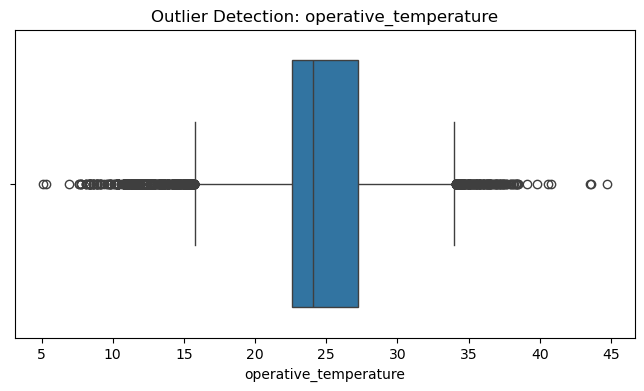

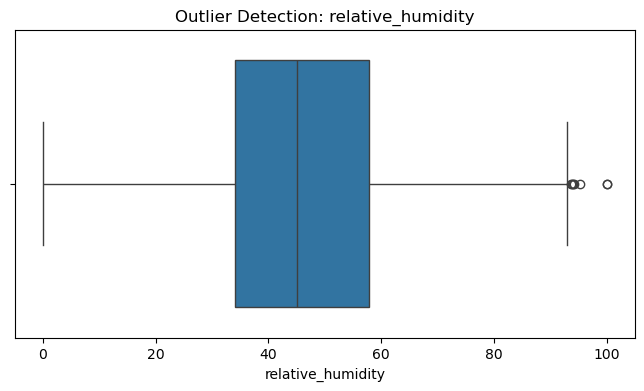

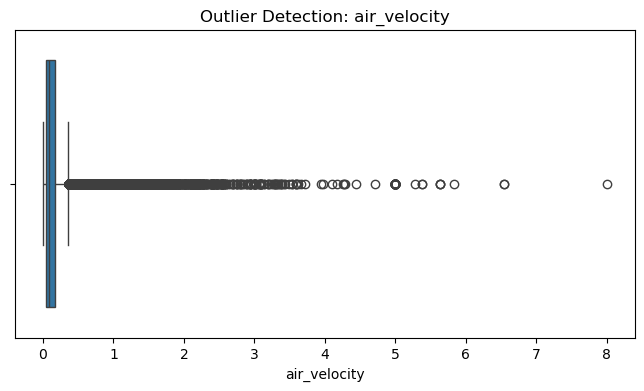

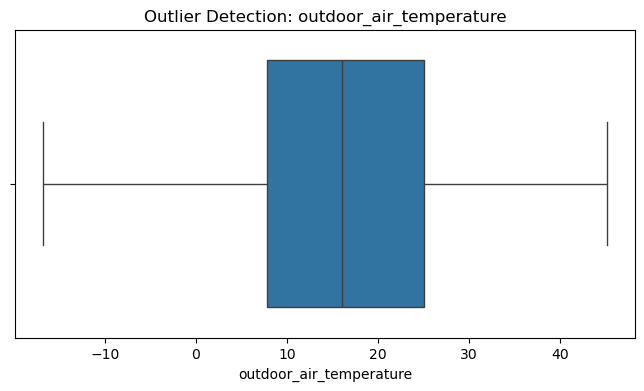

Feature: year, Outliers: 0, Outlier Percentage: 0.00%
Feature: age, Outliers: 292, Outlier Percentage: 0.34%
Feature: thermal_sensation, Outliers: 1806, Outlier Percentage: 2.11%
Feature: thermal_sensation_acceptability, Outliers: 12468, Outlier Percentage: 14.58%
Feature: thermal_comfort, Outliers: 1665, Outlier Percentage: 1.95%
Feature: standard_effective_temperature, Outliers: 1602, Outlier Percentage: 1.87%
Feature: clothing_insulation, Outliers: 4795, Outlier Percentage: 5.61%
Feature: metabolic_rate, Outliers: 3853, Outlier Percentage: 4.51%
Feature: air_temperature, Outliers: 3973, Outlier Percentage: 4.65%
Feature: operative_temperature, Outliers: 863, Outlier Percentage: 1.01%
Feature: relative_humidity, Outliers: 7, Outlier Percentage: 0.01%
Feature: air_velocity, Outliers: 7144, Outlier Percentage: 8.36%
Feature: outdoor_air_temperature, Outliers: 0, Outlier Percentage: 0.00%


In [29]:
# Boxplot for detecting outliers in numerical features
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=simplified_dataset, x=col)
    plt.title(f"Outlier Detection: {col}")
    plt.show()
# Calculate and print the percentage of outliers in each numerical feature
for col in numerical_cols:
    Q1 = simplified_dataset[col].quantile(0.25)
    Q3 = simplified_dataset[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = simplified_dataset[
        (simplified_dataset[col] < lower_bound)
        | (simplified_dataset[col] > upper_bound)
    ]
    outlier_percentage = (len(outliers) / len(simplified_dataset)) * 100
    print(
        f"Feature: {col}, Outliers: {len(outliers)}, Outlier Percentage: {outlier_percentage:.2f}%"
    )

In [30]:
# Function to cap outliers
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df


# Apply to features with high/moderate outlier percentages
outlier_features = [
    "age",
    "thermal_sensation",
    "thermal_sensation_acceptability",
    "clothing_insulation",
    "metabolic_rate",
    "air_temperature",
    "air_velocity",
    "standard_effective_temperature",
    "operative_temperature",
]
for col in outlier_features:
    df = cap_outliers(simplified_dataset, col)

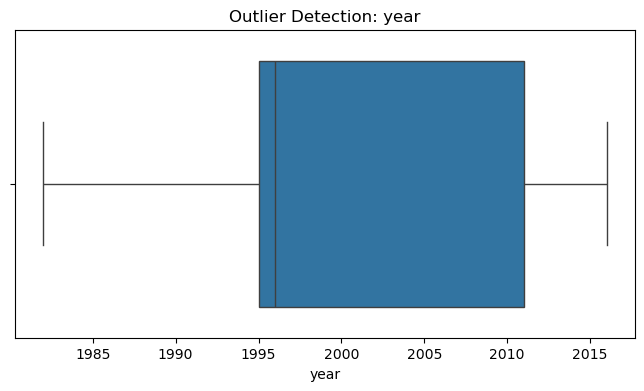

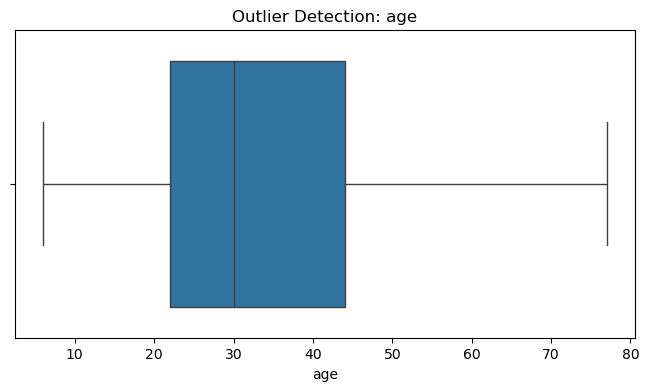

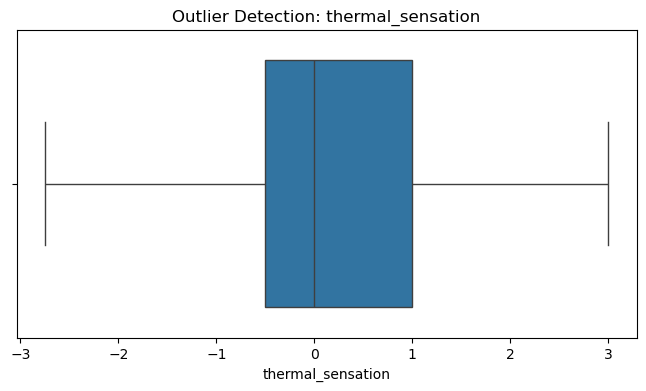

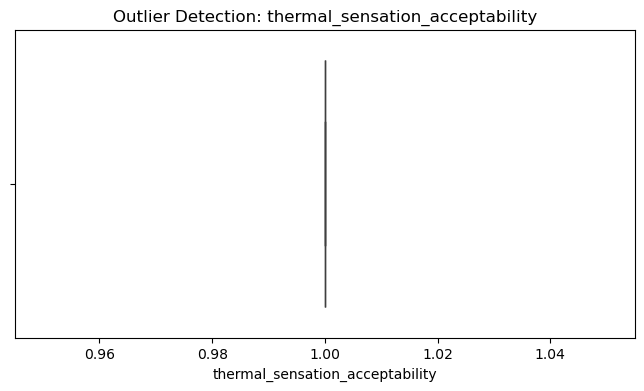

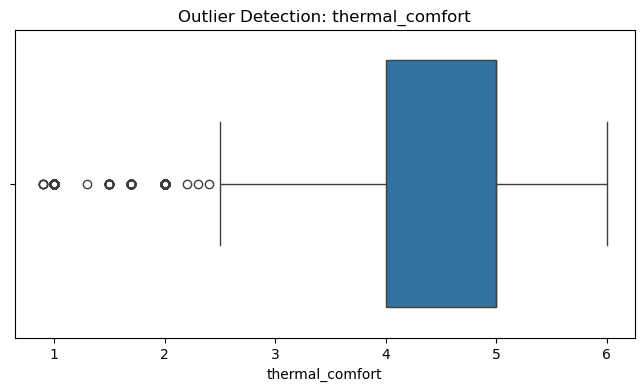

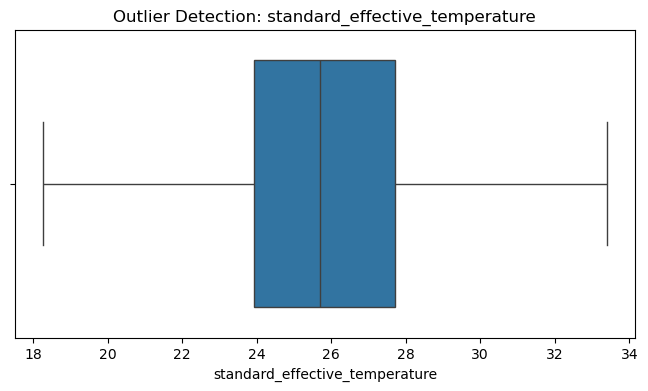

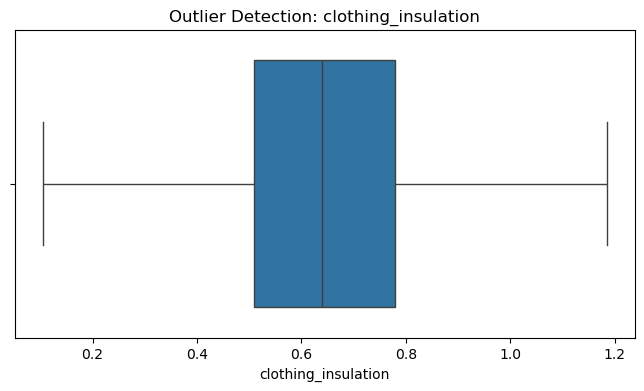

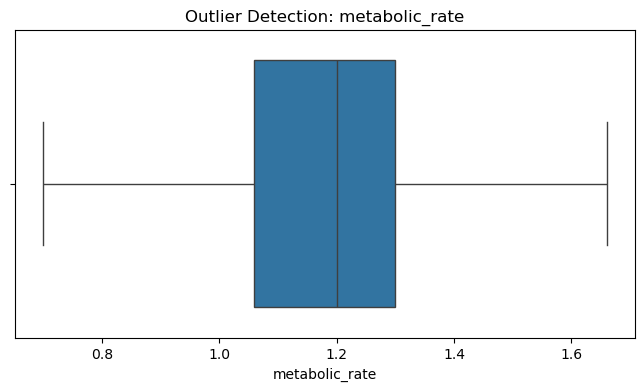

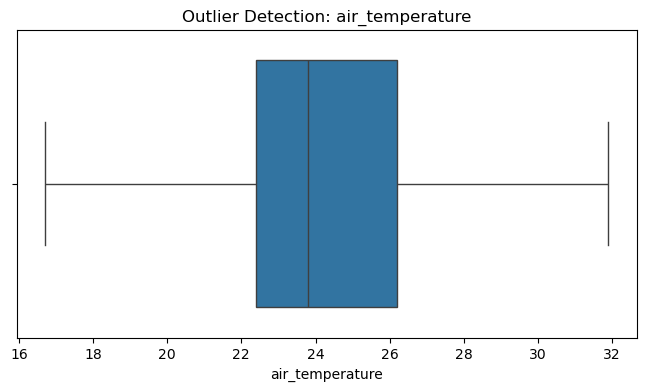

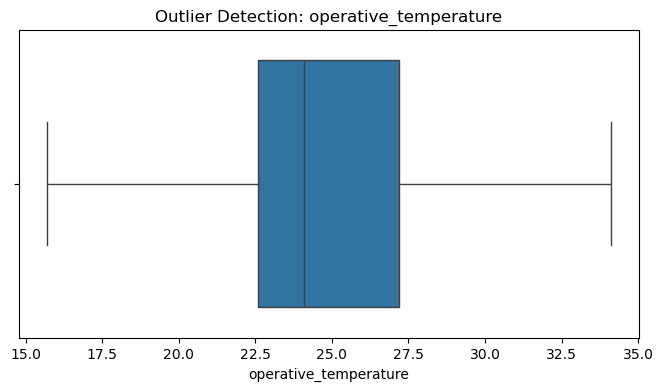

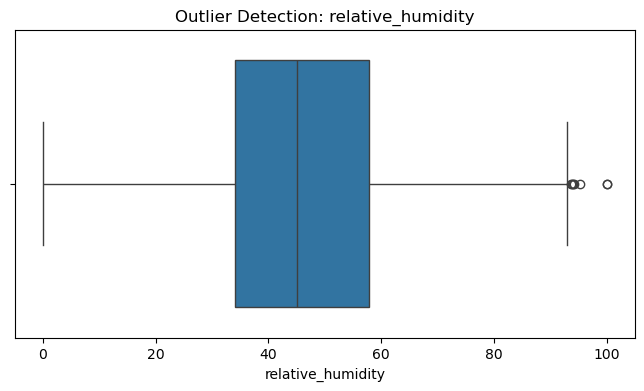

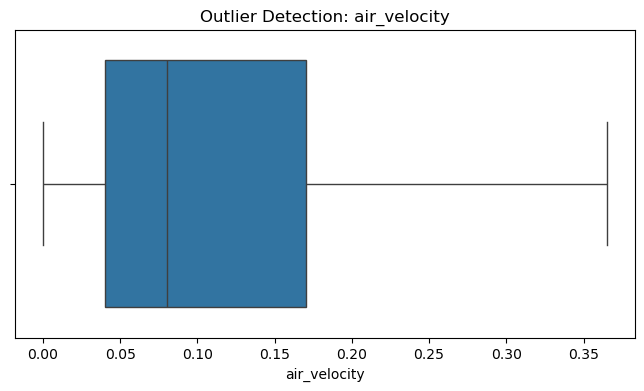

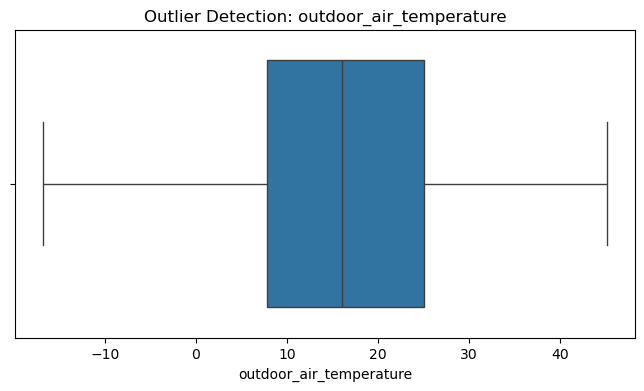

Feature: year, Outliers: 0, Outlier Percentage: 0.00%
Feature: age, Outliers: 0, Outlier Percentage: 0.00%
Feature: thermal_sensation, Outliers: 0, Outlier Percentage: 0.00%
Feature: thermal_sensation_acceptability, Outliers: 0, Outlier Percentage: 0.00%
Feature: thermal_comfort, Outliers: 1665, Outlier Percentage: 1.95%
Feature: standard_effective_temperature, Outliers: 0, Outlier Percentage: 0.00%
Feature: clothing_insulation, Outliers: 0, Outlier Percentage: 0.00%
Feature: metabolic_rate, Outliers: 0, Outlier Percentage: 0.00%
Feature: air_temperature, Outliers: 0, Outlier Percentage: 0.00%
Feature: operative_temperature, Outliers: 0, Outlier Percentage: 0.00%
Feature: relative_humidity, Outliers: 7, Outlier Percentage: 0.01%
Feature: air_velocity, Outliers: 0, Outlier Percentage: 0.00%
Feature: outdoor_air_temperature, Outliers: 0, Outlier Percentage: 0.00%


In [31]:
# Boxplot for detecting outliers in numerical features
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=simplified_dataset, x=col)
    plt.title(f"Outlier Detection: {col}")
    plt.show()
# Calculate and print the percentage of outliers in each numerical feature
for col in numerical_cols:
    Q1 = simplified_dataset[col].quantile(0.25)
    Q3 = simplified_dataset[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = simplified_dataset[
        (simplified_dataset[col] < lower_bound)
        | (simplified_dataset[col] > upper_bound)
    ]
    outlier_percentage = (len(outliers) / len(simplified_dataset)) * 100
    print(
        f"Feature: {col}, Outliers: {len(outliers)}, Outlier Percentage: {outlier_percentage:.2f}%"
    )

In [32]:
# Export the preprocessed dataframe to a CSV file
simplified_dataset.to_csv("preprocessed_ashrae_data.csv", index=False)

<div style="text-align: center; color:aquamarine">
  <h2>Feature Engineering</h2>
</div>
  <p>The following section of the code is responsible for feature engineering. Feature engineering involves creating new features or modifying existing ones to improve the performance of machine learning models. This process includes handling categorical variables, encoding, scaling, and transforming features to ensure they are in the optimal format for model training. Effective feature engineering can significantly enhance the predictive power of the models.</p>

In [33]:
# Import the preprocessed dataset
preprocessed_df = pd.read_csv("preprocessed_ashrae_data.csv")

# Display the shape and first few rows of the dataframe
print("Dataset Shape:", preprocessed_df.shape)
preprocessed_df.head()

Dataset Shape: (85500, 23)


year  season koppen_climate climate_description   city country  \
0  2000.0  Summer            Cfa   Humid subtropical  Tokyo   Japan   
1  2000.0  Summer            Cfa   Humid subtropical  Tokyo   Japan   
2  2000.0  Summer            Cfa   Humid subtropical  Tokyo   Japan   
3  2000.0  Summer            Cfa   Humid subtropical  Tokyo   Japan   
4  2000.0  Summer            Cfa   Humid subtropical  Tokyo   Japan   

  building_type cooling_strategy   age     sex  ...  air_movement_preference  \
0     Classroom  Air Conditioned  15.0  Female  ...                no change   
1     Classroom  Air Conditioned  15.0  Female  ...                no change   
2     Classroom  Air Conditioned  15.0    Male  ...                     more   
3     Classroom  Air Conditioned  14.0  Female  ...                     less   
4     Classroom  Air Conditioned  15.0    Male  ...                no change   

   thermal_comfort standard_effective_temperature clothing_insulation  \
0              5.0                            NaN                0.25   
1              5.0                            NaN                0.25   
2              6.0                            NaN                0.27   
3              4.0                            NaN                0.23   
4              6.0                            NaN                0.34   

   metabolic_rate  air_temperature  operative_temperature  relative_humidity  \
0             NaN             24.2                    NaN               50.2   
1             NaN             24.2                    NaN               50.2   
2             NaN             24.2                    NaN               50.2   
3             NaN             24.2                    NaN               50.2   
4             NaN             24.2                    NaN               50.2   

   air_velocity  outdoor_air_temperature  
0          0.06                     25.0  
1          0.06                     25.0  
2          0.06                     25.0  
3          0.06                     25.0  
4          0.06                     25.0  

[5 rows x 23 columns]

In [34]:
# Replace multiple types of null values with np.nan
preprocessed_df["thermal_comfort"] = preprocessed_df["thermal_comfort"].replace(
    ["Na", " "], np.nan
)

## Selecting Required features for our project

In [35]:
preprocessed_df = preprocessed_df[
    [
        "year",
        "season",
        "koppen_climate",
        "climate_description",
        "city",
        "country",
        "building_type",
        "cooling_strategy",
        "age",
        "sex",
        "thermal_sensation",
        "thermal_comfort",
        "clothing_insulation",
        "metabolic_rate",
        "air_temperature",
        "relative_humidity",
        "air_velocity",
        "outdoor_air_temperature",
        "thermal_preference",
    ]
]

In [36]:
preprocessed_df.sample(n=10)

year  season koppen_climate        climate_description  \
25624  1996.0  Summer            Csa   Hot-summer Mediterranean   
12922  2011.0  Autumn            BSh              Hot semi-arid   
67095  1983.0  Summer            Cfb                    Oceanic   
3340   2012.0  Summer             Aw       Tropical wet savanna   
72074  1993.0  Summer            BWh                 Hot desert   
16013  2014.0  Winter            Cfb          Temperate oceanic   
77100  1987.0  Summer            Csc  Cool-summer mediterranean   
25519  1996.0  Summer            Csa   Hot-summer Mediterranean   
62543  1988.0  Summer             Aw       Tropical wet savanna   
31969  1995.0  Winter            Csa   Hot-summer Mediterranean   

                city    country        building_type      cooling_strategy  \
25624        Midland         UK               Office  Naturally Ventilated   
12922         Jaipur      India  Multifamily housing  Naturally Ventilated   
67095      Melbourne  Australia               Office       Air Conditioned   
3340         Chennai      India               Office            Mixed Mode   
72074         Quetta   Pakistan                  NaN  Naturally Ventilated   
16013     Bratislava   Slovakia  Multifamily housing  Naturally Ventilated   
77100  San Francisco        USA               Office       Air Conditioned   
25519        Midland         UK               Office  Naturally Ventilated   
62543        Bangkok   Thailand               Office       Air Conditioned   
31969        Midland         UK               Office       Air Conditioned   

        age     sex  thermal_sensation  thermal_comfort  clothing_insulation  \
25624   NaN     NaN                0.0              NaN                 0.46   
12922  20.0  Female                1.0              4.0                 0.27   
67095  52.0    Male                1.0              NaN                 0.64   
3340    NaN    Male               -1.0              NaN                 0.64   
72074  45.0  Female                1.0              NaN                 0.62   
16013   NaN     NaN                2.0              NaN                  NaN   
77100   NaN    Male                0.0              3.0                 0.89   
25519   NaN     NaN               -2.0              NaN                 0.56   
62543  27.0    Male                0.0              NaN                 0.56   
31969   NaN     NaN                0.0              NaN                 0.71   

       metabolic_rate  air_temperature  relative_humidity  air_velocity  \
25624            1.10             22.7               43.6         0.020   
12922            1.00             31.9               21.2         0.365   
67095            1.23             23.2               50.9         0.140   
3340             1.00             24.3               51.0         0.080   
72074            1.01             27.8               14.1         0.150   
16013             NaN             25.5               40.0           NaN   
77100            1.40             23.6               67.9         0.060   
25519            1.30             23.8               38.2         0.060   
62543            1.10             20.8               62.0         0.100   
31969            1.10             24.4               26.5         0.030   

       outdoor_air_temperature thermal_preference  
25624                      4.0             cooler  
12922                     34.5             cooler  
67095                      NaN             cooler  
3340                      38.1          no change  
72074                      NaN             cooler  
16013                      7.8             cooler  
77100                      NaN             cooler  
25519                      4.0          no change  
62543                      NaN             cooler  
31969                     16.0          no change

### Checking for Highly Correlated Features

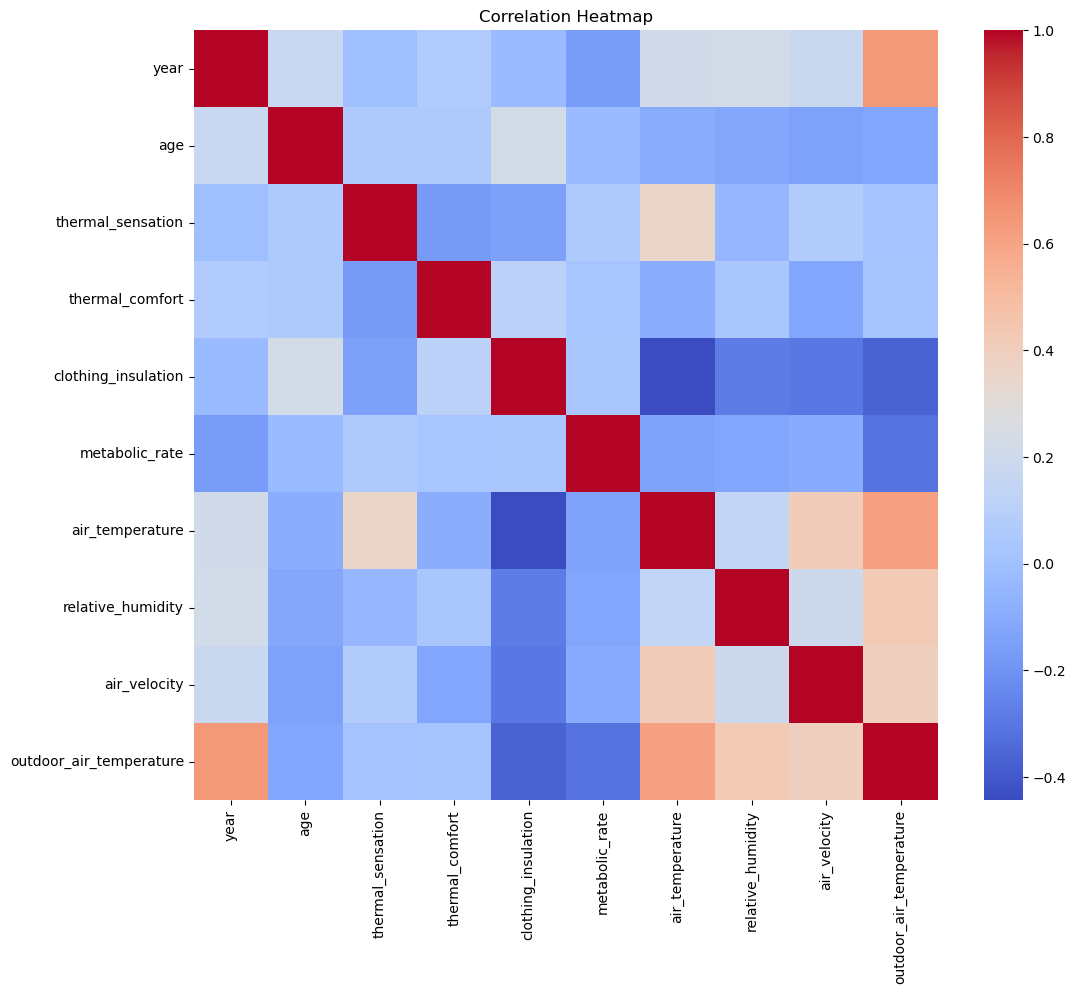

Highly Correlated Features:
 Empty DataFrame
Columns: [level_0, level_1, 0]
Index: []


In [37]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
numerical_cols = preprocessed_df.select_dtypes(include=["float64", "Int64"]).columns
correlation_matrix = preprocessed_df[numerical_cols].corr()
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, cbar=True)
plt.title("Correlation Heatmap")
plt.show()

# Highly correlated features
threshold = 0.8
high_corr_features = (
    correlation_matrix[abs(correlation_matrix) > threshold].stack().reset_index()
)
high_corr_features = high_corr_features[
    high_corr_features["level_0"] != high_corr_features["level_1"]
]
print("Highly Correlated Features:\n", high_corr_features)

## Imputing Null Values using different strategies

In [38]:
# copying DataFrame to avoid SettingWithCopyWarning
imputed_df = preprocessed_df.copy(deep=True)

# Define numerical and categorical columns
numerical_cols = imputed_df.select_dtypes(include=["float64", "int64"]).columns
categorical_cols = imputed_df.select_dtypes(include=["object"]).columns

# Exclude the target variable from processing
numerical_cols = numerical_cols.drop("thermal_preference", errors="ignore")

# Impute numerical columns with median
imputer_numeric = SimpleImputer(strategy="median")
imputed_df[numerical_cols] = imputer_numeric.fit_transform(imputed_df[numerical_cols])

# Impute categorical columns with the most frequent value
imputer_categorical = SimpleImputer(strategy="most_frequent")
imputed_df[categorical_cols] = imputer_categorical.fit_transform(
    imputed_df[categorical_cols]
)

imputed_df.head()

year  season koppen_climate climate_description   city country  \
0  2000.0  Summer            Cfa   Humid subtropical  Tokyo   Japan   
1  2000.0  Summer            Cfa   Humid subtropical  Tokyo   Japan   
2  2000.0  Summer            Cfa   Humid subtropical  Tokyo   Japan   
3  2000.0  Summer            Cfa   Humid subtropical  Tokyo   Japan   
4  2000.0  Summer            Cfa   Humid subtropical  Tokyo   Japan   

  building_type cooling_strategy   age     sex  thermal_sensation  \
0     Classroom  Air Conditioned  15.0  Female               -0.5   
1     Classroom  Air Conditioned  15.0  Female               -2.1   
2     Classroom  Air Conditioned  15.0    Male                0.5   
3     Classroom  Air Conditioned  14.0  Female               -2.5   
4     Classroom  Air Conditioned  15.0    Male               -0.5   

   thermal_comfort  clothing_insulation  metabolic_rate  air_temperature  \
0              5.0                 0.25             1.2             24.2   
1              5.0                 0.25             1.2             24.2   
2              6.0                 0.27             1.2             24.2   
3              4.0                 0.23             1.2             24.2   
4              6.0                 0.34             1.2             24.2   

   relative_humidity  air_velocity  outdoor_air_temperature thermal_preference  
0               50.2          0.06                     25.0             warmer  
1               50.2          0.06                     25.0          no change  
2               50.2          0.06                     25.0          no change  
3               50.2          0.06                     25.0          no change  
4               50.2          0.06                     25.0          no change


Percentage of Missing Values:
 year                       0.0
season                     0.0
koppen_climate             0.0
climate_description        0.0
city                       0.0
country                    0.0
building_type              0.0
cooling_strategy           0.0
age                        0.0
sex                        0.0
thermal_sensation          0.0
thermal_comfort            0.0
clothing_insulation        0.0
metabolic_rate             0.0
air_temperature            0.0
relative_humidity          0.0
air_velocity               0.0
outdoor_air_temperature    0.0
thermal_preference         0.0
dtype: float64


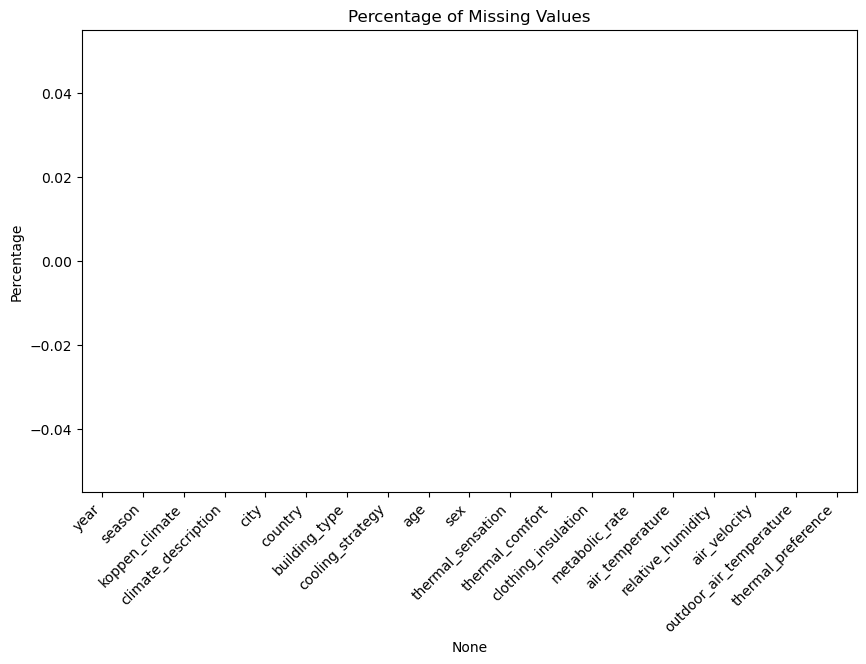

In [39]:
# Calculate percentage of missing values
missing_values = imputed_df.isnull().mean() * 100
print("\nPercentage of Missing Values:\n", missing_values)

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values)
plt.xticks(rotation=45, ha="right")
plt.title("Percentage of Missing Values")
plt.ylabel("Percentage")
plt.show()

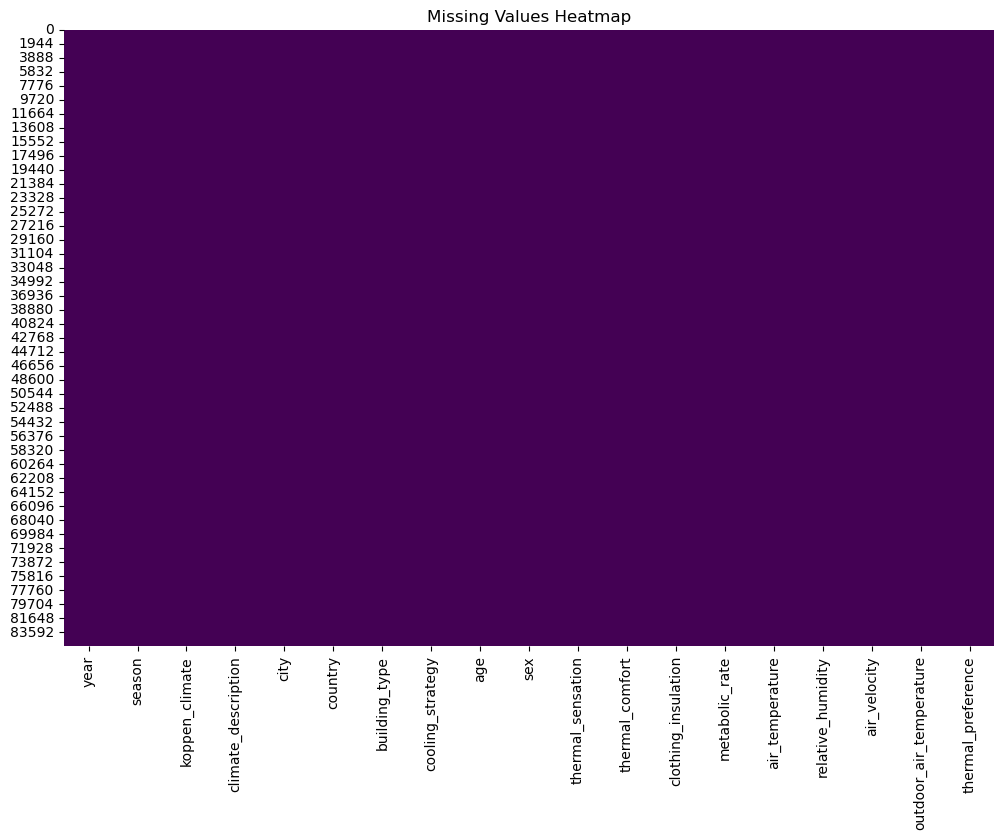

In [40]:
# Visualize missing values using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(imputed_df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [41]:
print(f"categorical_cols: {categorical_cols}")
print(f"numerical_cols: {numerical_cols}")

categorical_cols: Index(['season', 'koppen_climate', 'climate_description', 'city', 'country',
       'building_type', 'cooling_strategy', 'sex', 'thermal_preference'],
      dtype='object')
numerical_cols: Index(['year', 'age', 'thermal_sensation', 'thermal_comfort',
       'clothing_insulation', 'metabolic_rate', 'air_temperature',
       'relative_humidity', 'air_velocity', 'outdoor_air_temperature'],
      dtype='object')


## Encoding Categorical Variables

### Handling Year Column

In [42]:
# Calculate year_delta
imputed_df["year_delta"] = imputed_df["year"] - imputed_df["year"].min()

# Insert the year_delta column right after the year column
year_index = imputed_df.columns.get_loc("year")  # Get the index of the 'year' column
cols = list(imputed_df.columns)  # Get all columns as a list
# Rearrange columns: Insert year_delta after year
cols.insert(year_index + 1, cols.pop(cols.index("year_delta")))
imputed_df = imputed_df[cols]  # Reorder columns in the DataFrame

# Verify the placement of year_delta
imputed_df.head()

year  year_delta  season koppen_climate climate_description   city  \
0  2000.0        18.0  Summer            Cfa   Humid subtropical  Tokyo   
1  2000.0        18.0  Summer            Cfa   Humid subtropical  Tokyo   
2  2000.0        18.0  Summer            Cfa   Humid subtropical  Tokyo   
3  2000.0        18.0  Summer            Cfa   Humid subtropical  Tokyo   
4  2000.0        18.0  Summer            Cfa   Humid subtropical  Tokyo   

  country building_type cooling_strategy   age     sex  thermal_sensation  \
0   Japan     Classroom  Air Conditioned  15.0  Female               -0.5   
1   Japan     Classroom  Air Conditioned  15.0  Female               -2.1   
2   Japan     Classroom  Air Conditioned  15.0    Male                0.5   
3   Japan     Classroom  Air Conditioned  14.0  Female               -2.5   
4   Japan     Classroom  Air Conditioned  15.0    Male               -0.5   

   thermal_comfort  clothing_insulation  metabolic_rate  air_temperature  \
0              5.0                 0.25             1.2             24.2   
1              5.0                 0.25             1.2             24.2   
2              6.0                 0.27             1.2             24.2   
3              4.0                 0.23             1.2             24.2   
4              6.0                 0.34             1.2             24.2   

   relative_humidity  air_velocity  outdoor_air_temperature thermal_preference  
0               50.2          0.06                     25.0             warmer  
1               50.2          0.06                     25.0          no change  
2               50.2          0.06                     25.0          no change  
3               50.2          0.06                     25.0          no change  
4               50.2          0.06                     25.0          no change

### Handling SEASON, KOPPEN_CLIMATE, BUILDING_TYPE, COOLING_STRATEGY

### Columns in the Dataset

| **Column**               | **Encoding Recommendation**                              | **Reason**                                                                                   |
|--------------------------|---------------------------------------------------------|---------------------------------------------------------------------------------------------|
| `year`                   | No Encoding                                             | Treat as-is or use relative features (e.g., `year_delta`).                                  |
| `season`                 | One-Hot Encoding                                        | Low cardinality and categorical. No ordinal relationship.                                   |
| `koppen_climate`         | One-Hot Encoding                                        | Moderate cardinality. One-hot if space allows; label encoding for simpler models.           |
| `climate_description`    | Hash Encoding                                           | High cardinality (likely descriptive text). Hashing prevents dimensionality explosion.       |
| `city`                   | Hash Encoding                                           | High cardinality. Hashing works well for unseen cities; frequency encoding maintains trends. |
| `country`                | Hash Encoding                                           | Moderate cardinality. Use label encoding for tree-based models or frequency encoding.       |
| `building_type`          | One-Hot Encoding                                        | Low cardinality. Categories like residential/commercial.                                    |
| `cooling_strategy`       | One-Hot Encoding                                        | Low cardinality. Represents distinct strategies.                                            |
| `age`                    | No Encoding                                             | Continuous numerical feature.                                                              |
| `sex`                    | Label Encoding                                          | Binary categorical feature.                                                                |
| `thermal_sensation`      | No Encoding                                             | Numerical target-like feature.                                                             |
| `thermal_comfort`        | No Encoding                                             | Ordinal variable; consider scaling instead of encoding.                                     |
| `clothing_insulation`    | No Encoding                                             | Continuous numerical feature.                                                              |
| `metabolic_rate`         | No Encoding                                             | Continuous numerical feature.                                                              |
| `air_temperature`        | No Encoding                                             | Continuous numerical feature.                                                              |
| `relative_humidity`      | No Encoding                                             | Continuous numerical feature.                                                              |
| `air_velocity`           | No Encoding                                             | Continuous numerical feature.                                                              |
| `outdoor_air_temperature`| No Encoding                                             | Continuous numerical feature.                                                              |
| `thermal_preference`     | Label Encoding                                          | Target variable for classification tasks.                                                  |


### Label Encode Sex and Thermal Preference

In [43]:
encoded_df = imputed_df.copy(deep=True)

# Label encode binary categories (e.g., sex)
if "sex" in categorical_cols:
    label_encoder = LabelEncoder()
    encoded_df["sex"] = label_encoder.fit_transform(encoded_df["sex"])
    encoded_df["thermal_preference"] = label_encoder.fit_transform(
        encoded_df["thermal_preference"]
    )

In [44]:
for col in categorical_cols:
    unique_values = encoded_df[col].unique()
    print(f"Unique values in column '{col} {len(unique_values)}': {unique_values}\n")

Unique values in column 'season 4': ['Summer' 'Autumn' 'Winter' 'Spring']

Unique values in column 'koppen_climate 15': ['Cfa' 'Csb' 'Aw' 'BSh' 'Csa' 'Csc' 'Af' 'Cfb' 'Am' 'BWh' 'Cwa' 'Cwb'
 'Dwa' 'Dfb' 'As']

Unique values in column 'climate_description 18': ['Humid subtropical' 'Warm-summer Mediterranean' 'Tropical wet savanna'
 'Hot semi-arid' 'Hot-summer Mediterranean' 'Cool-summer Mediterranean'
 'Tropical rainforest' 'Temperate oceanic' 'Tropical monsoon' 'Hot desert'
 'Monsoon-influenced humid subtropical' 'Subtropical highland'
 'Monsoon-influenced hot-summer humid continental'
 'Cool-summer mediterranean' 'Warm-summer humid continental' 'Oceanic'
 'Hot-summer mediterranean' 'Tropical dry savanna']

Unique values in column 'city 69': ['Tokyo' 'Texas' 'Berkeley' 'Chennai' 'Hyderabad' 'Ilam' 'Alameda'
 'Makati' 'Sydney' 'Jaipur' 'Kuala Lumpur' 'Midland' 'Kota Kinabalu'
 'Beverly Hills' 'Putra Jaya' 'Kinarut' 'Kuching' 'Bedong' 'Bratislava'
 'Elsinore' 'London' 'Lyon' 'Gothenburg'

In [45]:
# Drop 'city' and 'climate_description' columns
encoded_df = encoded_df.drop(columns=["city", "climate_description", "year"])

# Display the updated dataframe
print("Updated DataFrame Columns:\n", encoded_df.columns)

Updated DataFrame Columns:
 Index(['year_delta', 'season', 'koppen_climate', 'country', 'building_type',
       'cooling_strategy', 'age', 'sex', 'thermal_sensation',
       'thermal_comfort', 'clothing_insulation', 'metabolic_rate',
       'air_temperature', 'relative_humidity', 'air_velocity',
       'outdoor_air_temperature', 'thermal_preference'],
      dtype='object')


### Hash Encode Country

In [46]:
# Initialize the hasher
hasher = FeatureHasher(
    n_features=10, input_type="string"
)  # Adjust n_features as needed

# Apply hashing to 'country', 'city', and 'climate_description'
hashed_country = hasher.transform(encoded_df["country"].astype(str).map(lambda x: [x]))

# Convert the hashed features into DataFrames
hashed_country_df = pd.DataFrame(
    hashed_country.toarray(), columns=[f"hashed_country_{i}" for i in range(10)]
)

# Concatenate the hashed columns with the original DataFrame
hash_encoded_df = pd.concat(
    [encoded_df.reset_index(drop=True), hashed_country_df],
    axis=1,
)

# Drop the original columns if they are no longer needed
hash_encoded_df.drop(columns=["country"], inplace=True)

# Display the updated DataFrame
print("Updated DataFrame with Hashing Encoding:\n")
hash_encoded_df.head()

Updated DataFrame with Hashing Encoding:



year_delta  season koppen_climate building_type cooling_strategy   age  \
0        18.0  Summer            Cfa     Classroom  Air Conditioned  15.0   
1        18.0  Summer            Cfa     Classroom  Air Conditioned  15.0   
2        18.0  Summer            Cfa     Classroom  Air Conditioned  15.0   
3        18.0  Summer            Cfa     Classroom  Air Conditioned  14.0   
4        18.0  Summer            Cfa     Classroom  Air Conditioned  15.0   

   sex  thermal_sensation  thermal_comfort  clothing_insulation  ...  \
0    0               -0.5              5.0                 0.25  ...   
1    0               -2.1              5.0                 0.25  ...   
2    1                0.5              6.0                 0.27  ...   
3    0               -2.5              4.0                 0.23  ...   
4    1               -0.5              6.0                 0.34  ...   

   hashed_country_0  hashed_country_1  hashed_country_2  hashed_country_3  \
0               0.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               0.0   
2               0.0               0.0               0.0               0.0   
3               0.0               0.0               0.0               0.0   
4               0.0               0.0               0.0               0.0   

   hashed_country_4  hashed_country_5  hashed_country_6  hashed_country_7  \
0               0.0               1.0               0.0               0.0   
1               0.0               1.0               0.0               0.0   
2               0.0               1.0               0.0               0.0   
3               0.0               1.0               0.0               0.0   
4               0.0               1.0               0.0               0.0   

   hashed_country_8  hashed_country_9  
0               0.0               0.0  
1               0.0               0.0  
2               0.0               0.0  
3               0.0               0.0  
4               0.0               0.0  

[5 rows x 26 columns]

In [47]:
hash_encoded_df.columns

Index(['year_delta', 'season', 'koppen_climate', 'building_type',
       'cooling_strategy', 'age', 'sex', 'thermal_sensation',
       'thermal_comfort', 'clothing_insulation', 'metabolic_rate',
       'air_temperature', 'relative_humidity', 'air_velocity',
       'outdoor_air_temperature', 'thermal_preference', 'hashed_country_0',
       'hashed_country_1', 'hashed_country_2', 'hashed_country_3',
       'hashed_country_4', 'hashed_country_5', 'hashed_country_6',
       'hashed_country_7', 'hashed_country_8', 'hashed_country_9'],
      dtype='object')

### One-Hot Encode Season, Koppen Climate, Building Type, and Cooling Strategy

In [48]:
# Perform one-hot encoding on the specified columns
columns_to_encode = ["season", "koppen_climate", "building_type", "cooling_strategy"]
one_hash_encoded_df = pd.get_dummies(
    hash_encoded_df, columns=columns_to_encode, drop_first=True
)

# Display the updated DataFrame
print("Updated DataFrame with One-Hot Encoding:\n", one_hash_encoded_df.head())

Updated DataFrame with One-Hot Encoding:
    year_delta   age  sex  thermal_sensation  thermal_comfort  \
0        18.0  15.0    0               -0.5              5.0   
1        18.0  15.0    0               -2.1              5.0   
2        18.0  15.0    1                0.5              6.0   
3        18.0  14.0    0               -2.5              4.0   
4        18.0  15.0    1               -0.5              6.0   

   clothing_insulation  metabolic_rate  air_temperature  relative_humidity  \
0                 0.25             1.2             24.2               50.2   
1                 0.25             1.2             24.2               50.2   
2                 0.27             1.2             24.2               50.2   
3                 0.23             1.2             24.2               50.2   
4                 0.34             1.2             24.2               50.2   

   air_velocity  ...  koppen_climate_Cwb  koppen_climate_Dfb  \
0          0.06  ...               False

In [49]:
one_hash_encoded_df.sample(n=10)

year_delta   age  sex  thermal_sensation  thermal_comfort  \
38695        16.0  30.0    1                0.0              5.0   
33535        14.0  30.0    1               -1.0              5.0   
49346        30.0  30.0    1                0.0              5.0   
80610        11.0  30.0    1               -1.0              6.0   
71002        11.0  57.0    1                0.0              5.0   
79236        10.0  23.0    1               -0.8              4.0   
67361         1.0  31.0    1               -0.5              5.0   
38307        16.0  30.0    0               -2.0              5.0   
10917        27.0  35.0    1               -1.0              5.0   
22786        13.0  30.0    1               -2.0              5.0   

       clothing_insulation  metabolic_rate  air_temperature  \
38695                 0.48            1.66             22.7   
33535                 0.78            1.20             23.0   
49346                 0.35            1.20             23.8   
80610                 0.47            1.00             22.2   
71002                 0.50            1.01             30.5   
79236                 0.72            1.12             23.3   
67361                 0.65            1.20             23.0   
38307                 0.81            1.20             24.7   
10917                 0.68            1.30             21.3   
22786                 0.64            1.20             20.9   

       relative_humidity  air_velocity  ...  koppen_climate_Cwb  \
38695               62.2         0.060  ...               False   
33535               24.2         0.040  ...               False   
49346               45.1         0.080  ...               False   
80610               50.3         0.080  ...               False   
71002               48.2         0.365  ...               False   
79236               42.0         0.130  ...               False   
67361               33.7         0.365  ...               False   
38307               37.7         0.300  ...               False   
10917               56.5         0.080  ...               False   
22786               44.3         0.010  ...               False   

       koppen_climate_Dfb  koppen_climate_Dwa  \
38695               False               False   
33535               False               False   
49346               False               False   
80610               False               False   
71002               False               False   
79236               False               False   
67361               False               False   
38307               False               False   
10917               False               False   
22786               False               False   

       building_type_Multifamily housing  building_type_Office  \
38695                              False                 False   
33535                              False                  True   
49346                              False                 False   
80610                              False                  True   
71002                              False                  True   
79236                              False                  True   
67361                              False                  True   
38307                              False                 False   
10917                              False                  True   
22786                              False                  True   

       building_type_Others  building_type_Senior center  \
38695                  True                        False   
33535                 False                        False   
49346                 False                        False   
80610                 False                        False   
71002                 False                        False   
79236                 False                        False   
67361                 False                        False   
38307                  True                        False   
10917              

### Scaling Numerical Features without YEAR

In [50]:
# List of numerical columns to scale (excluding target variable, year, and non-numerical columns)
numerical_cols_wo_year = [
    "age",
    "thermal_sensation",
    "thermal_comfort",
    "clothing_insulation",
    "metabolic_rate",
    "air_temperature",
    "relative_humidity",
    "air_velocity",
    "outdoor_air_temperature",
]

# Verify the selected columns
print("Numerical Columns to Scale:", numerical_cols)

Numerical Columns to Scale: Index(['year', 'age', 'thermal_sensation', 'thermal_comfort',
       'clothing_insulation', 'metabolic_rate', 'air_temperature',
       'relative_humidity', 'air_velocity', 'outdoor_air_temperature'],
      dtype='object')


In [51]:
# Exclude the target variable from scaling
scaler = StandardScaler()
one_hash_encoded_df[numerical_cols_wo_year] = scaler.fit_transform(
    one_hash_encoded_df[numerical_cols_wo_year]
)
one_hash_encoded_df[numerical_cols_wo_year].head()

age  thermal_sensation  thermal_comfort  clothing_insulation  \
0 -1.734134          -0.540024         0.210249            -1.845122   
1 -1.734134          -1.867782         0.210249            -1.845122   
2 -1.734134           0.289825         1.679869            -1.757354   
3 -1.841118          -2.199721        -1.259372            -1.932889   
4 -1.734134          -0.540024         1.679869            -1.450170   

   metabolic_rate  air_temperature  relative_humidity  air_velocity  \
0        0.026099        -0.058416           0.287875     -0.531408   
1        0.026099        -0.058416           0.287875     -0.531408   
2        0.026099        -0.058416           0.287875     -0.531408   
3        0.026099        -0.058416           0.287875     -0.531408   
4        0.026099        -0.058416           0.287875     -0.531408   

   outdoor_air_temperature  
0                 0.935655  
1                 0.935655  
2                 0.935655  
3                 0.935655  
4                 0.935655

In [52]:
# Export the sampled dataframe to a CSV file
one_hash_encoded_df.to_csv("encoded_scaled_ashrae_data.csv", index=False)

### Scaling Validation

In [53]:
scaled_df = one_hash_encoded_df.copy(deep=True)
# Check mean and standard deviation of scaled features (for StandardScaler)
scaled_summary = scaled_df[numerical_cols_wo_year].describe().T[["mean", "std"]]
print("Mean and Std of Scaled Features:\n", scaled_summary)

# Check min and max for MinMaxScaler
scaled_min_max = scaled_df[numerical_cols_wo_year].agg(["min", "max"])
print("Min and Max of Scaled Features:\n", scaled_min_max)

Mean and Std of Scaled Features:
                                  mean       std
age                     -8.509892e-17  1.000006
thermal_sensation        1.595605e-17  1.000006
thermal_comfort          1.967913e-16  1.000006
clothing_insulation     -7.286595e-16  1.000006
metabolic_rate          -7.662227e-17  1.000006
air_temperature         -1.187396e-15  1.000006
relative_humidity       -3.084836e-16  1.000006
air_velocity            -9.839563e-17  1.000006
outdoor_air_temperature  1.569011e-16  1.000006
Min and Max of Scaled Features:
           age  thermal_sensation  thermal_comfort  clothing_insulation  \
min -2.696987          -2.407184        -5.815195            -2.481433   
max  4.898851           2.364447         1.679869             2.257990   

     metabolic_rate  air_temperature  relative_humidity  air_velocity  \
min       -2.836540        -2.411039          -3.093512     -1.114435   
max        2.659727         2.356945           3.642319      2.432316   

     outdo

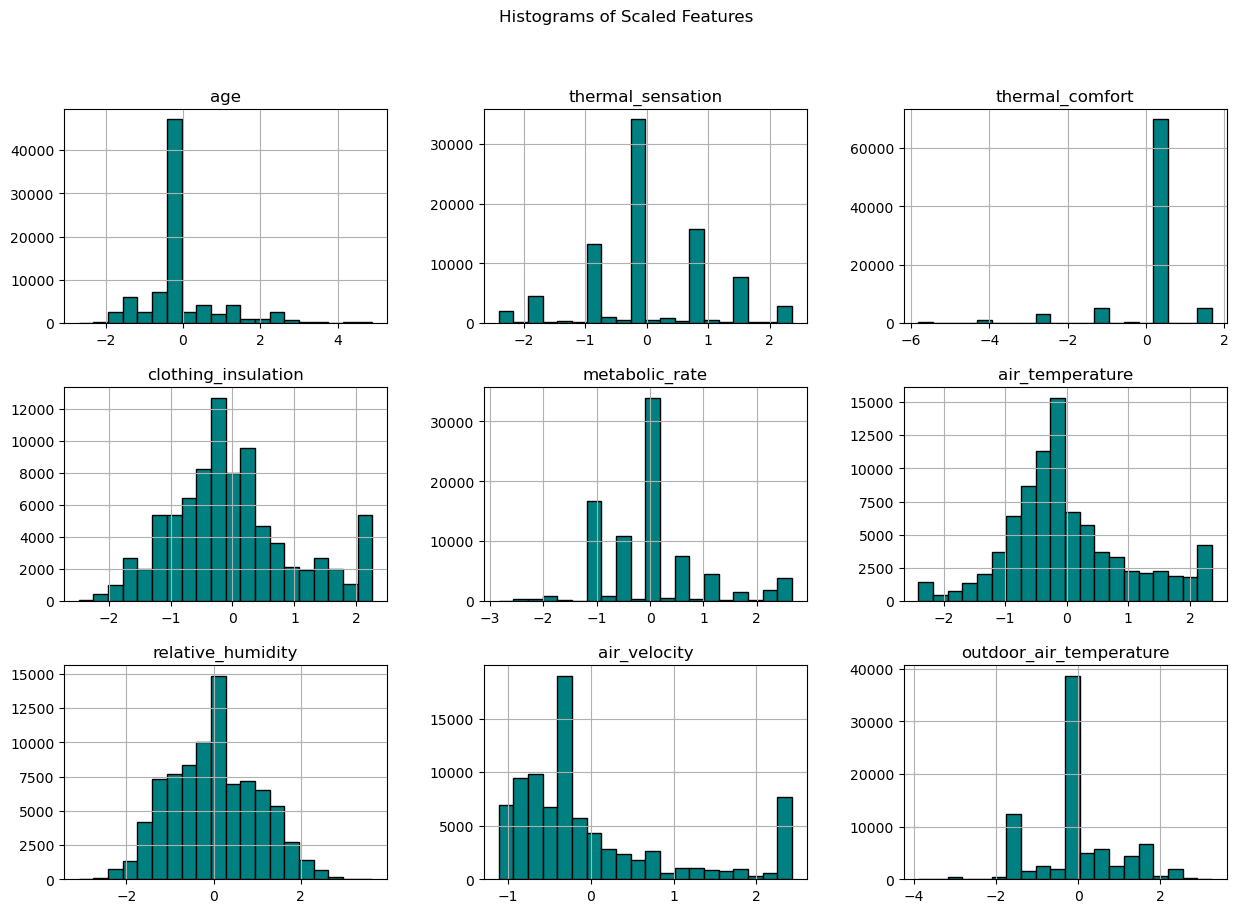

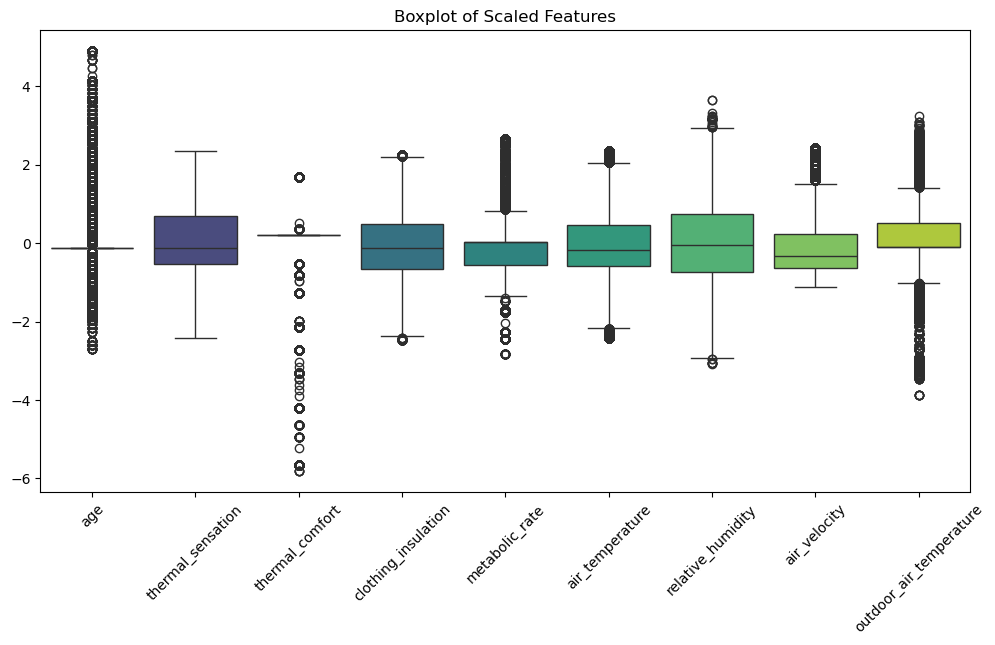

In [54]:
# Plot histograms for scaled features
scaled_df[numerical_cols_wo_year].hist(
    figsize=(15, 10), bins=20, color="teal", edgecolor="black"
)
plt.suptitle("Histograms of Scaled Features")
plt.show()

# Boxplot for scaled features
plt.figure(figsize=(12, 6))
sns.boxplot(data=scaled_df[numerical_cols_wo_year], palette="viridis")
plt.title("Boxplot of Scaled Features")
plt.xticks(rotation=45)
plt.show()

### ENCODING VALIDATION

In [55]:
# Check presence of encoded columns
encoded_columns = [
    col
    for col in scaled_df.columns
    if col.startswith(
        ("season_", "koppen_climate_", "building_type_", "cooling_strategy_")
    )
]
print("Encoded Columns:\n", encoded_columns)

Encoded Columns:
 ['season_Spring', 'season_Summer', 'season_Winter', 'koppen_climate_Am', 'koppen_climate_As', 'koppen_climate_Aw', 'koppen_climate_BSh', 'koppen_climate_BWh', 'koppen_climate_Cfa', 'koppen_climate_Cfb', 'koppen_climate_Csa', 'koppen_climate_Csb', 'koppen_climate_Csc', 'koppen_climate_Cwa', 'koppen_climate_Cwb', 'koppen_climate_Dfb', 'koppen_climate_Dwa', 'building_type_Multifamily housing', 'building_type_Office', 'building_type_Others', 'building_type_Senior center', 'cooling_strategy_Mechanically Ventilated', 'cooling_strategy_Mixed Mode', 'cooling_strategy_Naturally Ventilated']


In [56]:
# Check if original columns were dropped
original_columns = ["season", "koppen_climate", "building_type", "cooling_strategy"]
missing_original_columns = [
    col for col in original_columns if col not in scaled_df.columns
]
print("Original Columns Dropped:", missing_original_columns)

Original Columns Dropped: ['season', 'koppen_climate', 'building_type', 'cooling_strategy']


In [57]:
# Example: Verify One-Hot Encoding consistency for 'season'
season_encoded_columns = [col for col in encoded_columns if col.startswith("season_")]
season_sums = scaled_df[season_encoded_columns].sum(axis=1)
print("Rows with Inconsistent One-Hot Encoding:", (season_sums != 1).sum())

Rows with Inconsistent One-Hot Encoding: 10423


In [58]:
missing_values = scaled_df.isnull().sum()
print(
    "Missing Values After Scaling and Encoding:\n", missing_values[missing_values > 0]
)

Missing Values After Scaling and Encoding:
 Series([], dtype: int64)


In [59]:
# Confirm dataset shape before and after encoding/scaling
print("Dataset Shape After Scaling and Encoding:", scaled_df.shape)

Dataset Shape After Scaling and Encoding: (85500, 46)


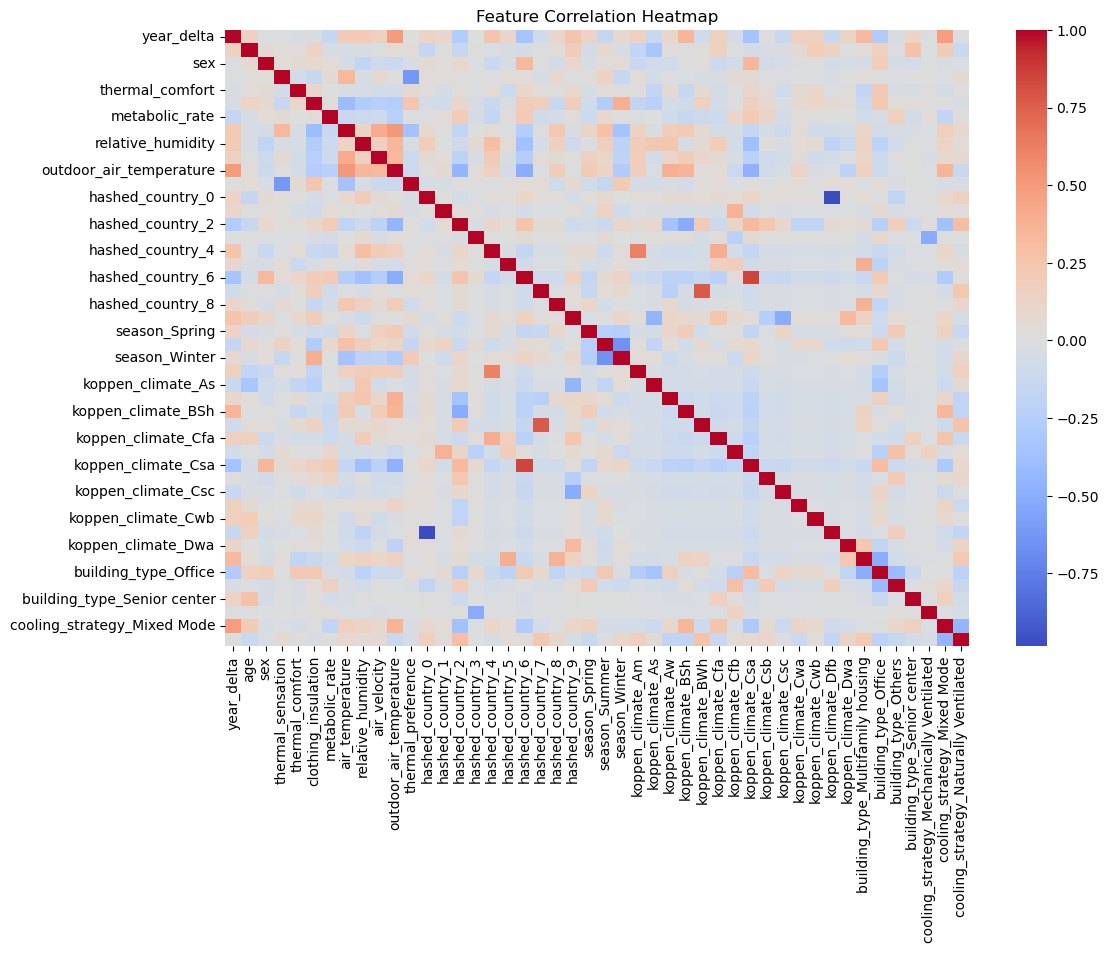

In [60]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(scaled_df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

In [61]:
hashed_columns = [col for col in scaled_df.columns if col.startswith("hashed_")]
print("Distribution of Hashed Features:\n", scaled_df[hashed_columns].sum().describe())

Distribution of Hashed Features:
 count       10.000000
mean       474.000000
std      10795.782438
min     -19069.000000
25%      -2200.500000
50%       1206.500000
75%       2669.000000
max      23681.000000
dtype: float64


In [62]:
# Function to test encoding inconsistency for one-hot encoded columns
def check_one_hot_encoding_consistency(df, original_columns, encoded_prefixes):
    for original_col, prefix in zip(original_columns, encoded_prefixes):
        # Identify one-hot encoded columns for this feature
        encoded_columns = [col for col in df.columns if col.startswith(prefix)]

        # Check if rows sum to exactly 1
        row_sums = df[encoded_columns].sum(axis=1)
        inconsistent_rows = (row_sums != 1).sum()

        # Report inconsistencies
        print(f"Original Column: '{original_col}'")
        print(f"Encoded Columns: {encoded_columns}")
        print(f"Rows with Inconsistent Encoding: {inconsistent_rows}")
        print("-" * 50)


# Define original columns and their corresponding one-hot encoded prefixes
original_columns = ["season", "koppen_climate", "building_type", "cooling_strategy"]
encoded_prefixes = ["season_", "koppen_climate_", "building_type_", "cooling_strategy_"]

# Run the consistency check
check_one_hot_encoding_consistency(scaled_df, original_columns, encoded_prefixes)

Original Column: 'season'
Encoded Columns: ['season_Spring', 'season_Summer', 'season_Winter']
Rows with Inconsistent Encoding: 10423
--------------------------------------------------
Original Column: 'koppen_climate'
Encoded Columns: ['koppen_climate_Am', 'koppen_climate_As', 'koppen_climate_Aw', 'koppen_climate_BSh', 'koppen_climate_BWh', 'koppen_climate_Cfa', 'koppen_climate_Cfb', 'koppen_climate_Csa', 'koppen_climate_Csb', 'koppen_climate_Csc', 'koppen_climate_Cwa', 'koppen_climate_Cwb', 'koppen_climate_Dfb', 'koppen_climate_Dwa']
Rows with Inconsistent Encoding: 863
--------------------------------------------------
Original Column: 'building_type'
Encoded Columns: ['building_type_Multifamily housing', 'building_type_Office', 'building_type_Others', 'building_type_Senior center']
Rows with Inconsistent Encoding: 10158
--------------------------------------------------
Original Column: 'cooling_strategy'
Encoded Columns: ['cooling_strategy_Mechanically Ventilated', 'cooling_strate

### Encoding and Scaling Validation Conclusion

<div style="text-align: center; color:aquamarine">
  <h2>Model Training & Evaluation</h2>
</div>
  <p>The following section of the code is responsible for training and evaluating machine learning models. This includes splitting the dataset into training and testing sets, selecting appropriate algorithms, training the models, and evaluating their performance using various metrics. The goal is to identify the best-performing model for predicting thermal comfort based on the given features.</p>

In [63]:
# Split data into features (X) and target (y)
X = scaled_df.drop(columns=["thermal_preference"])
y = scaled_df["thermal_preference"]

# Full dataset split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Sampled dataset split (10% for quick model evaluation)
X_sample, _, y_sample, _ = train_test_split(
    X_train, y_train, train_size=0.1, random_state=42, stratify=y_train
)

# Display shapes
print("Full Train Shape:", X_train.shape, "Sample Train Shape:", X_sample.shape)

Full Train Shape: (68400, 45) Sample Train Shape: (6840, 45)


(a) Logistic Regression

c:\Users\sakif\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression (Full Data) Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.66      0.72      5419
           1       0.71      0.87      0.78      8688
           2       0.75      0.48      0.58      2993

    accuracy                           0.73     17100
   macro avg       0.75      0.67      0.69     17100
weighted avg       0.74      0.73      0.73     17100

Accuracy: 0.7329239766081871


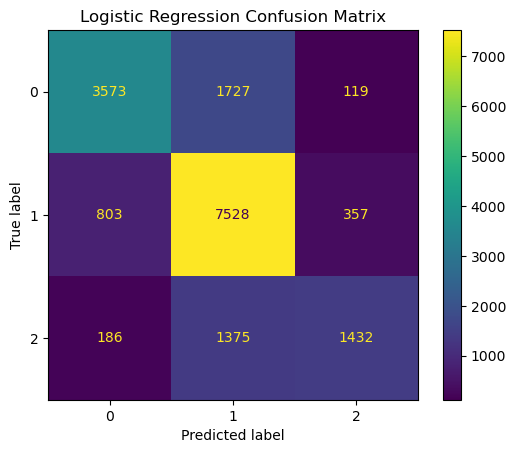

In [64]:
# Logistic Regression on Full Data
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

# Evaluate the model
print(
    "Logistic Regression (Full Data) Classification Report:\n",
    classification_report(y_test, y_pred_lr),
)
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_lr, labels=log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap="viridis")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

(b) Random Forest Classifier

Random Forest (Full Data) Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.80      0.79      5419
           1       0.79      0.83      0.81      8688
           2       0.78      0.66      0.71      2993

    accuracy                           0.79     17100
   macro avg       0.79      0.76      0.77     17100
weighted avg       0.79      0.79      0.79     17100

Accuracy: 0.7883040935672515


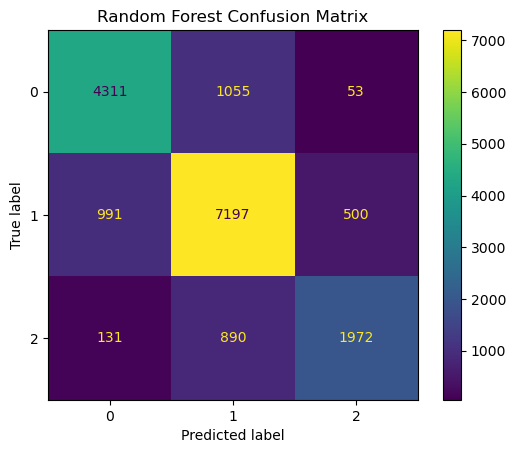

In [65]:
# Random Forest on Full Data
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print(
    "Random Forest (Full Data) Classification Report:\n",
    classification_report(y_test, y_pred_rf),
)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_rf, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap="viridis")
plt.title("Random Forest Confusion Matrix")
plt.show()

(c) Gradient Boosting Models

XGBoost

c:\Users\sakif\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:07:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost (Full Data) Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79      5419
           1       0.78      0.83      0.80      8688
           2       0.77      0.67      0.72      2993

    accuracy                           0.79     17100
   macro avg       0.78      0.76      0.77     17100
weighted avg       0.79      0.79      0.78     17100

Accuracy: 0.7853216374269005


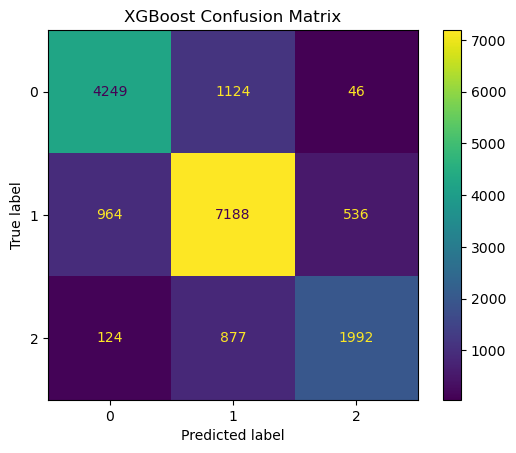

In [66]:
# XGBoost
xgb = XGBClassifier(random_state=42, eval_metric="mlogloss", use_label_encoder=False)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Evaluate the model
print(
    "XGBoost (Full Data) Classification Report:\n",
    classification_report(y_test, y_pred_xgb),
)
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb, labels=xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb.classes_)
disp.plot(cmap="viridis")
plt.title("XGBoost Confusion Matrix")
plt.show()

LightGBM

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003237 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1136
[LightGBM] [Info] Number of data points in the train set: 68400, number of used features: 45
[LightGBM] [Info] Start training from score -1.149259
[LightGBM] [Info] Start training from score -0.677107
[LightGBM] [Info] Start training from score -1.742719
LightGBM (Full Data) Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.79      5419
           1       0.78      0.83      0.80      8688
           2       0.78      0.66      0.72      2993

    accuracy                           0.78     17100
   macro avg       0.78      0.76      0.77     17100
weighted avg       0.78      0.78 

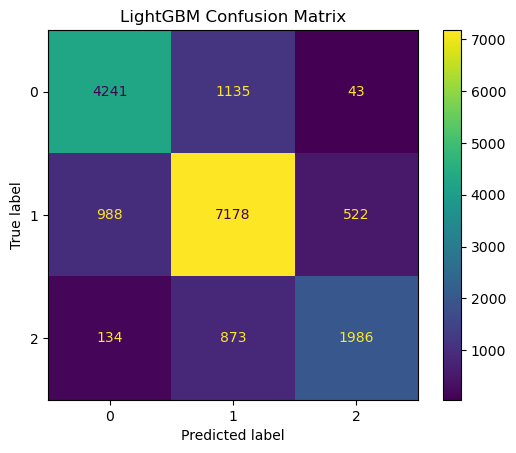

In [67]:
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)


# Evaluate the model
print(
    "LightGBM (Full Data) Classification Report:\n",
    classification_report(y_test, y_pred_lgbm),
)
print("Accuracy:", accuracy_score(y_test, y_pred_lgbm))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_lgbm, labels=lgbm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lgbm.classes_)
disp.plot(cmap="viridis")
plt.title("LightGBM Confusion Matrix")
plt.show()

CatBoost (Full Data) Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79      5419
           1       0.78      0.83      0.80      8688
           2       0.78      0.67      0.72      2993

    accuracy                           0.79     17100
   macro avg       0.78      0.76      0.77     17100
weighted avg       0.79      0.79      0.78     17100

Accuracy: 0.7859649122807018


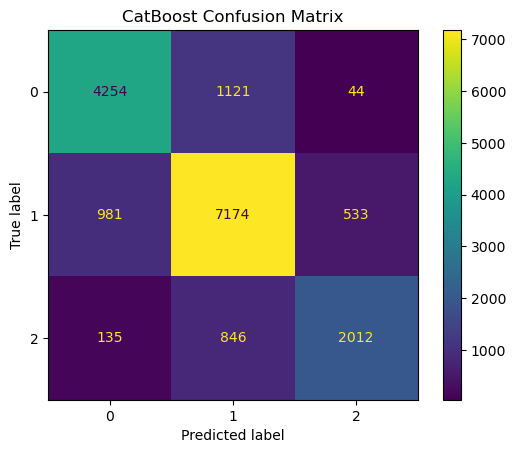

In [68]:
# CatBoost
catboost = CatBoostClassifier(random_state=42, verbose=0)
catboost.fit(X_train, y_train)
y_pred_cat = catboost.predict(X_test)

# Evaluate the model
print(
    "CatBoost (Full Data) Classification Report:\n",
    classification_report(y_test, y_pred_cat),
)
print("Accuracy:", accuracy_score(y_test, y_pred_cat))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_cat, labels=catboost.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=catboost.classes_)
disp.plot(cmap="viridis")
plt.title("CatBoost Confusion Matrix")
plt.show()

### Ensemble Model (Voting Classifier)

In [69]:
ensemble = VotingClassifier(
    estimators=[("rf", rf), ("xgb", xgb), ("cat", catboost)],
    voting="soft",
)

ensemble.fit(X_train, y_train)
ensemble_accuracy = ensemble.score(X_test, y_test)
print("Ensemble Model Accuracy:", ensemble_accuracy)

c:\Users\sakif\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:08:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble Model Accuracy: 0.7916959064327486


In [70]:
# Dictionary to store model names and accuracies
model_accuracies = {
    "Logistic Regression": accuracy_score(y_test, y_pred_lr),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "XGBoost": accuracy_score(y_test, y_pred_xgb),
    "LightGBM": accuracy_score(y_test, y_pred_lgbm),
    "CatBoost": accuracy_score(y_test, y_pred_cat),
    "ensemble": ensemble_accuracy,
}

# Display results
for model, accuracy in model_accuracies.items():
    print(f"{model}: {accuracy:.4f}")

Logistic Regression: 0.7329
Random Forest: 0.7883
XGBoost: 0.7853
LightGBM: 0.7839
CatBoost: 0.7860
ensemble: 0.7917


In [71]:
# SVM
svm = SVC(kernel="rbf", random_state=42)
svm.fit(X_sample, y_sample)
y_pred_svm = svm.predict(X_test)

print(
    "SVM Classification (Sampled Data) Classification Report:\n",
    classification_report(y_test, y_pred_svm),
)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

# Naive Bayes
nb = GaussianNB()
nb.fit(X_sample, y_sample)
y_pred_nb = nb.predict(X_test)

print(
    "Naive Bayes (Sampled Data) Classification Report:\n",
    classification_report(y_test, y_pred_nb),
)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))

# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_sample, y_sample)
y_pred_knn = knn.predict(X_test)

print(
    "KNN (Sampled Data) Classification Report:\n",
    classification_report(y_test, y_pred_knn),
)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

# MLP
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=42)
mlp.fit(X_sample, y_sample)
y_pred_mlp = mlp.predict(X_test)

print(
    "MLP (Sampled Data) Classification Report:\n",
    classification_report(y_test, y_pred_mlp),
)
print("MLP Accuracy:", accuracy_score(y_test, y_pred_mlp))

# ElasticNet (Sample Data)
elastic_net = LogisticRegression(
    penalty="elasticnet", solver="saga", l1_ratio=0.5, max_iter=1000, random_state=42
)
elastic_net.fit(X_sample, y_sample)
y_pred_elastic = elastic_net.predict(X_test)

print(
    "Elastic Net  (Sampled Data) Classification Report:\n",
    classification_report(y_test, y_pred_elastic),
)
print("Elastic Net Accuracy:", accuracy_score(y_test, y_pred_elastic))

# CatBoost (Sample Data)
catboost_sd = CatBoostClassifier(random_state=42, verbose=0)
catboost_sd.fit(X_sample, y_sample)
y_pred_catboost_sd = catboost_sd.predict(X_test)

print(
    "CatBoost Classification (Sample Data) Report:\n",
    classification_report(y_test, y_pred_catboost_sd),
)
print("CatBoost Accuracy:", accuracy_score(y_test, y_pred_catboost_sd))

SVM Classification (Sampled Data) Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.63      0.71      5419
           1       0.67      0.90      0.77      8688
           2       0.83      0.29      0.43      2993

    accuracy                           0.71     17100
   macro avg       0.77      0.61      0.64     17100
weighted avg       0.74      0.71      0.69     17100

SVM Accuracy: 0.7112865497076023
Naive Bayes (Sampled Data) Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.62      0.60      5419
           1       0.70      0.25      0.37      8688
           2       0.28      0.75      0.40      2993

    accuracy                           0.45     17100
   macro avg       0.52      0.54      0.46     17100
weighted avg       0.59      0.45      0.45     17100

Naive Bayes Accuracy: 0.45432748538011697
KNN (Sampled Data) Classification Report:
            

c:\Users\sakif\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP (Sampled Data) Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.75      0.73      5419
           1       0.75      0.75      0.75      8688
           2       0.68      0.61      0.64      2993

    accuracy                           0.72     17100
   macro avg       0.71      0.70      0.71     17100
weighted avg       0.72      0.72      0.72     17100

MLP Accuracy: 0.7249122807017544


c:\Users\sakif\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Elastic Net  (Sampled Data) Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.65      0.71      5419
           1       0.70      0.87      0.78      8688
           2       0.76      0.46      0.57      2993

    accuracy                           0.73     17100
   macro avg       0.75      0.66      0.69     17100
weighted avg       0.74      0.73      0.72     17100

Elastic Net Accuracy: 0.7281871345029239
CatBoost Classification (Sample Data) Report:
               precision    recall  f1-score   support

           0       0.77      0.76      0.77      5419
           1       0.77      0.81      0.79      8688
           2       0.73      0.63      0.68      2993

    accuracy                           0.76     17100
   macro avg       0.76      0.73      0.74     17100
weighted avg       0.76      0.76      0.76     17100

CatBoost Accuracy: 0.7623976608187134


In [72]:
# Dictionary to store model names and accuracies
model_accuracies_sampled = {
    "SVM": accuracy_score(y_test, y_pred_svm),
    "KNN": accuracy_score(y_test, y_pred_knn),
    "MLP": accuracy_score(y_test, y_pred_mlp),
    "Naive Bayes": accuracy_score(y_test, y_pred_nb),
    "CatBoost": accuracy_score(y_test, y_pred_catboost_sd),
    "Elastic Net": accuracy_score(y_test, y_pred_elastic),
}

# Display results
for model, accuracy in model_accuracies_sampled.items():
    print(f"{model}: {accuracy:.4f}")

SVM: 0.7113
KNN: 0.6925
MLP: 0.7249
Naive Bayes: 0.4543
CatBoost: 0.7624
Elastic Net: 0.7282


c:\Users\sakif\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\sakif\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:10:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002632 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1136
[LightGBM] [Info] Number of data points in the train set: 68400, number of used features: 45
[LightGBM] [Info] Start training from score -1.149259
[LightGBM] [Info] Start training from score -0.677107
[LightGBM] [Info] Start training from score -1.742719


c:\Users\sakif\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:10:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\sakif\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


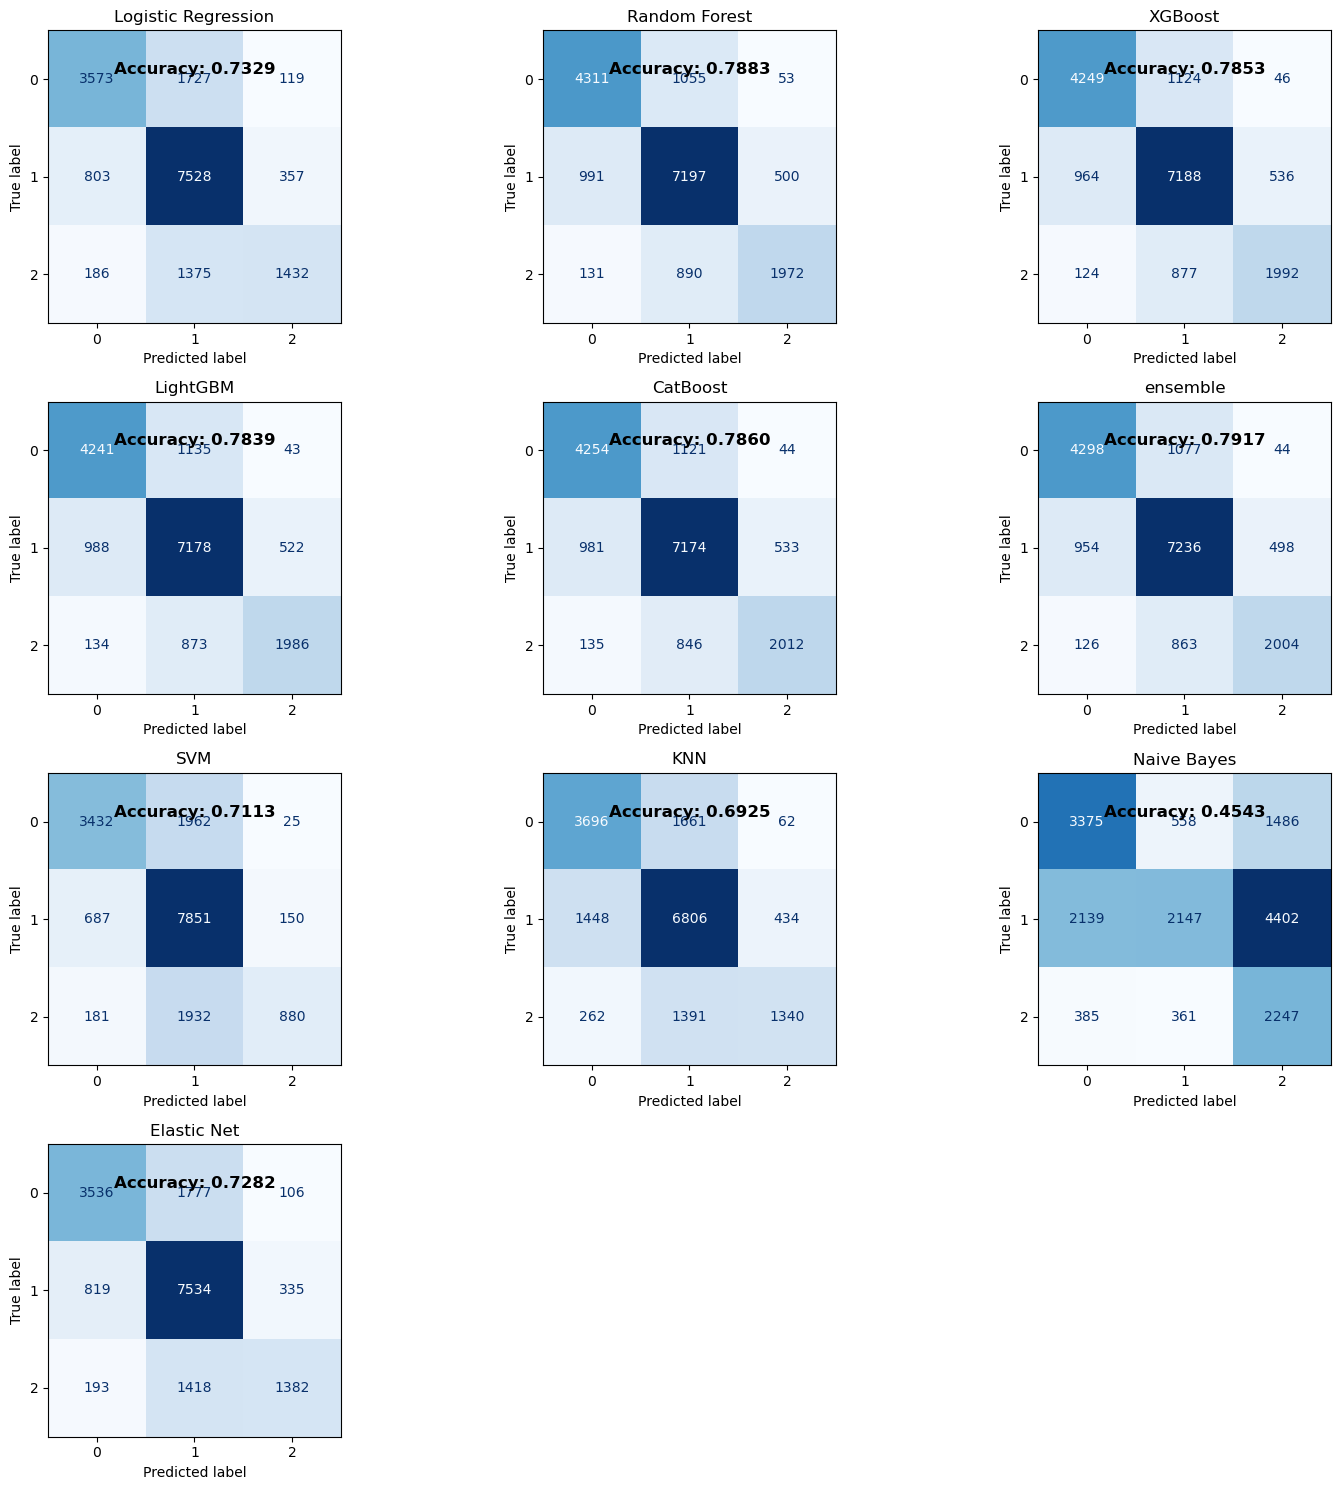

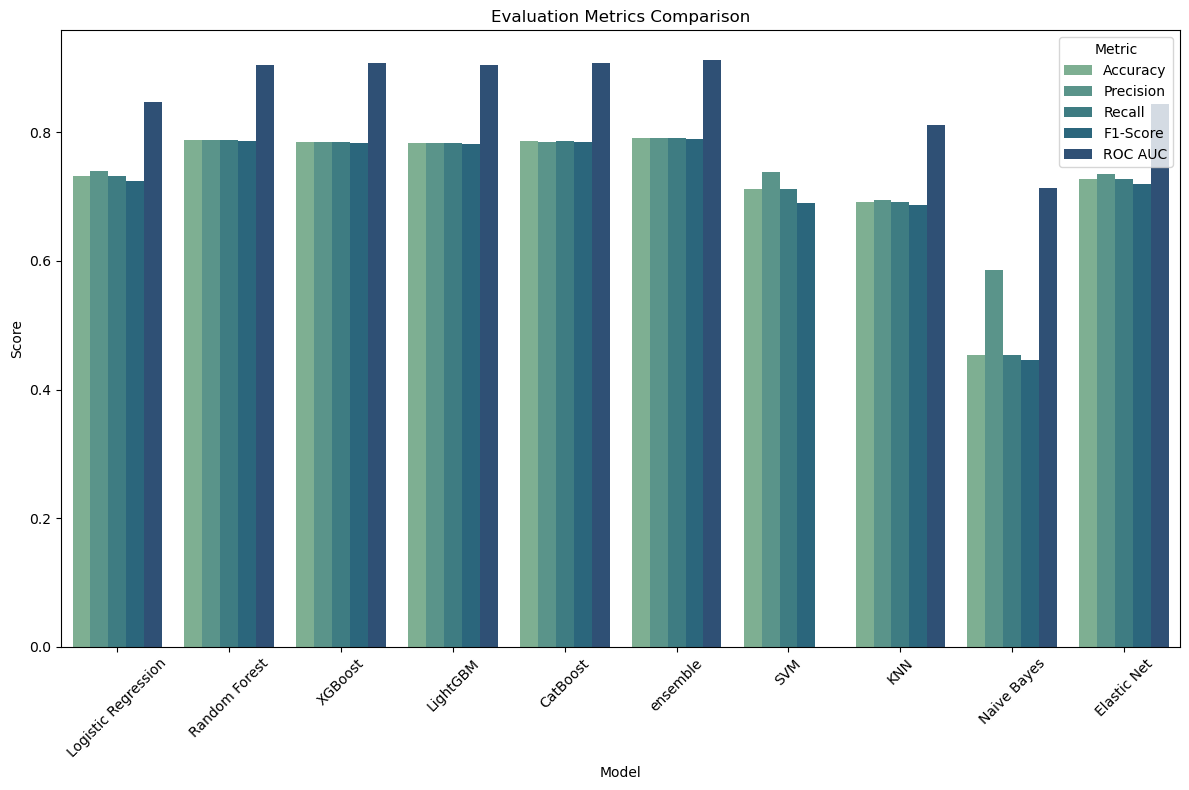

                 Model  Accuracy  Precision    Recall  F1-Score   ROC AUC
0  Logistic Regression  0.732924   0.739370  0.732924  0.725148  0.847337
1        Random Forest  0.788304   0.788128  0.788304  0.787043  0.904826
2              XGBoost  0.785322   0.785184  0.785322  0.784203  0.907276
3             LightGBM  0.783918   0.783874  0.783918  0.782770  0.905106
4             CatBoost  0.785965   0.785805  0.785965  0.784951  0.907535
5             ensemble  0.791696   0.791683  0.791696  0.790548  0.913179
6                  SVM  0.711287   0.738549  0.711287  0.690342       NaN
7                  KNN  0.692515   0.695178  0.692515  0.686440  0.810946
8          Naive Bayes  0.454327   0.585436  0.454327  0.445292  0.712790
9          Elastic Net  0.728187   0.735845  0.728187  0.719580  0.844519


In [73]:
# Create a dictionary of models
models = {
    "Logistic Regression": log_reg,
    "Random Forest": rf,
    "XGBoost": xgb,
    "LightGBM": lgbm,
    "CatBoost": catboost,
    "ensemble": ensemble,
    "SVM": svm,
    "KNN": knn,
    "Naive Bayes": nb,
    "Elastic Net": elastic_net,
}

models_sampled = {
    "SVM": svm,
    "KNN": knn,
    "Naive Bayes": nb,
    "Elastic Net": elastic_net,
}

# Initialize dictionaries to store evaluation metrics
accuracy_scores = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}
roc_auc_scores = {}

# Set up the subplot grid (4x3 for 10 models)
fig, axes = plt.subplots(4, 3, figsize=(15, 15))

# Flatten axes for easier iteration
axes = axes.ravel()

# Iterate over models, fit, and generate confusion matrix & evaluation metrics
for i, (name, model) in enumerate(models.items()):
    # Train the model
    if name in models_sampled.keys():
        model.fit(X_sample, y_sample)
    else:
        model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=axes[i], cmap="Blues", colorbar=False)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    try:
        roc_auc = roc_auc_score(
            y_test, model.predict_proba(X_test), multi_class="ovr", average="weighted"
        )
    except:
        roc_auc = (
            None  # Some models don't support probability estimation, like Naive Bayes
        )

    # Store evaluation metrics
    accuracy_scores[name] = accuracy
    precision_scores[name] = precision
    recall_scores[name] = recall
    f1_scores[name] = f1
    roc_auc_scores[name] = roc_auc

    # Set plot title and accuracy text
    axes[i].set_title(f"{name}")
    axes[i].text(
        0.5,
        0.85,
        f"Accuracy: {accuracy:.4f}",
        horizontalalignment="center",
        transform=axes[i].transAxes,
        fontsize=12,
        color="black",
        weight="bold",
    )

# Remove the last two empty subplots
fig.delaxes(axes[-1])
fig.delaxes(axes[-2])

# Adjust layout for subplots
plt.tight_layout()
plt.show()

# Plot evaluation metrics
metrics_df = pd.DataFrame(
    {
        "Accuracy": accuracy_scores,
        "Precision": precision_scores,
        "Recall": recall_scores,
        "F1-Score": f1_scores,
        "ROC AUC": roc_auc_scores,
    }
)

# Barplot for evaluation metrics using seaborn
# Melt the dataframe for easier plotting with seaborn
metrics_melted = metrics_df.reset_index().melt(
    id_vars="index", var_name="Metric", value_name="Score"
)

# Plot the barplot
plt.figure(figsize=(12, 8))
sns.barplot(
    x="index",
    y="Score",
    hue="Metric",
    data=metrics_melted,
    palette="crest",
)
plt.title("Evaluation Metrics Comparison")
plt.ylabel("Score")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print all the evaluation metrics of all the models in a tabular format
metrics_df = pd.DataFrame(
    {
        "Model": list(accuracy_scores.keys()),
        "Accuracy": list(accuracy_scores.values()),
        "Precision": list(precision_scores.values()),
        "Recall": list(recall_scores.values()),
        "F1-Score": list(f1_scores.values()),
        "ROC AUC": list(roc_auc_scores.values()),
    }
)

print(metrics_df)

<div style="text-align: center; color:aquamarine">
  <h4>First Phase of Model Training and Evaluation Completed</h4>
</div>

---

---



<div style="text-align: center; color:aquamarine">
  <h4>Second Phase of Model Training and Evaluation Starts</h4>
</div>

<div style="text-align: center; color:aquamarine">
  <h2>Hyperparameter Tuning</h2>
</div>
  <p>The following section of the code is responsible for hyperparameter tuning. Hyperparameter tuning involves selecting the best set of hyperparameters for a machine learning model to improve its performance. This process includes using techniques such as GridSearchCV and RandomizedSearchCV to systematically search for the optimal hyperparameters. Effective hyperparameter tuning can significantly enhance the predictive power and generalization ability of the models.</p>

In [74]:
evaluated_df = scaled_df.copy(deep=True)

### Handling Imbalanced Classes

In [75]:
X = evaluated_df.drop(
    columns=["thermal_preference"]
)  # Replace with your actual target variable
y = evaluated_df["thermal_preference"]

# Handle class imbalance using SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split into train/test set
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Check the new class distribution
print(y_resampled.value_counts())

thermal_preference
2    43441
1    43441
0    43441
Name: count, dtype: int64


### Hyperparameter Tuning for Random Forest Classifier

In [76]:
# Hyperparameter tuning for Random Forest
rf_params = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}
rf = RandomForestClassifier(random_state=42)
rf_search = RandomizedSearchCV(
    rf, param_distributions=rf_params, n_iter=10, cv=3, random_state=42, verbose=2
)
rf_search.fit(X_train, y_train)
print(f"Best Random Forest Params: {rf_search.best_params_}")

# Hyperparameter tuning for XGBoost
xgb_params = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 7],
    "subsample": [0.7, 0.8, 0.9],
    "colsample_bytree": [0.7, 0.8, 0.9],
}
xgb = XGBClassifier(random_state=42)
xgb_search = RandomizedSearchCV(
    xgb, param_distributions=xgb_params, n_iter=10, cv=3, random_state=42, verbose=2
)
xgb_search.fit(X_train, y_train)
print(f"Best XGBoost Params: {xgb_search.best_params_}")

# Hyperparameter tuning for LightGBM
lgbm_params = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 7],
    "num_leaves": [31, 50, 100],
}
lgbm = LGBMClassifier(random_state=42)
lgbm_search = RandomizedSearchCV(
    lgbm, param_distributions=lgbm_params, n_iter=10, cv=3, random_state=42, verbose=2
)
lgbm_search.fit(X_train, y_train)
print(f"Best LightGBM Params: {lgbm_search.best_params_}")

# Hyperparameter tuning for CatBoost
catboost_params = {
    "iterations": [100, 200],
    "depth": [6, 8, 10],
    "learning_rate": [0.01, 0.05, 0.1],
    "l2_leaf_reg": [1, 3, 5],
}
catboost = CatBoostClassifier(random_state=42, verbose=0)
catboost_search = RandomizedSearchCV(
    catboost,
    param_distributions=catboost_params,
    n_iter=5,
    cv=3,
    random_state=42,
    verbose=2,
)
catboost_search.fit(X_train, y_train)
print(f"Best CatBoost Params: {catboost_search.best_params_}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  13.4s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  13.6s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  14.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   7.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   7.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   9.5s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=  15.2s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=  17.6s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=  15.5s
[CV] END max_depth=20, min_sam

Best XGBoost Params: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.2, 'colsample_bytree': 0.9}

Best LightGBM Params: {'num_leaves': 50, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.2}

Best CatBoost Params: {'learning_rate': 0.05, 'l2_leaf_reg': 3, 'iterations': 200, 'depth': 10}

### Evaluating Random Forest using Cross-Validation

In [77]:
# Evaluate Random Forest using cross-validation
rf_cv_scores = cross_val_score(
    rf_search.best_estimator_, X_train, y_train, cv=5, scoring="accuracy"
)
print(f"Random Forest Cross-Validation Accuracy: {np.mean(rf_cv_scores):.4f}")

# Evaluate XGBoost using cross-validation
xgb_cv_scores = cross_val_score(
    xgb_search.best_estimator_, X_train, y_train, cv=5, scoring="accuracy"
)
print(f"XGBoost Cross-Validation Accuracy: {np.mean(xgb_cv_scores):.4f}")

# Evaluate LightGBM using cross-validation
lgbm_cv_scores = cross_val_score(
    lgbm_search.best_estimator_, X_train, y_train, cv=5, scoring="accuracy"
)
print(f"LightGBM Cross-Validation Accuracy: {np.mean(lgbm_cv_scores):.4f}")

# Evaluate CatBoost using cross-validation
catboost_cv_scores = cross_val_score(
    catboost_search.best_estimator_, X_train, y_train, cv=5, scoring="accuracy"
)
print(f"CatBoost Cross-Validation Accuracy: {np.mean(catboost_cv_scores):.4f}")

Random Forest Cross-Validation Accuracy: 0.8424
XGBoost Cross-Validation Accuracy: 0.8406
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004715 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2603
[LightGBM] [Info] Number of data points in the train set: 83406, number of used features: 45
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098576
[LightGBM] [Info] Start training from score -1.098648
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

| Model           | Cross-Validation Accuracy |
|-----------------|---------------------------|
| Random Forest   | 0.8424                    |
| XGBoost         | 0.8406                    |
| LightGBM        | 0.8406                    |
| CatBoost        | 0.8042                    |

## Ensemble Models

### Stacking Classifier

In [78]:
# Stacking Classifier
base_learners = [
    ("rf", rf_search.best_estimator_),
    ("xgb", xgb_search.best_estimator_),
    ("lgbm", lgbm_search.best_estimator_),
    ("catboost", catboost_search.best_estimator_),
]

meta_classifier = LogisticRegression()  # Logistic Regression as meta-classifier

stacking_clf = StackingClassifier(
    estimators=base_learners, final_estimator=meta_classifier
)

# Fit the stacking classifier
stacking_clf.fit(X_train, y_train)

# Evaluate performance
y_pred_stack = stacking_clf.predict(X_test)
print("Stacking Classifier Accuracy:", accuracy_score(y_test, y_pred_stack))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005284 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2630
[LightGBM] [Info] Number of data points in the train set: 104258, number of used features: 45
[LightGBM] [Info] Start training from score -1.098603
[LightGBM] [Info] Start training from score -1.098603
[LightGBM] [Info] Start training from score -1.098631
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

### Stacking Classifier Accuracy: 0.8606176865528486

### Voting Classifier

In [79]:
# Voting Classifier (Soft Voting)
voting_clf = VotingClassifier(
    estimators=[
        ("rf", rf_search.best_estimator_),
        ("xgb", xgb_search.best_estimator_),
        ("lgbm", lgbm_search.best_estimator_),
        ("catboost", catboost_search.best_estimator_),
    ],
    voting="soft",  # Soft voting (uses probabilities)
)

# Fit the voting classifier
voting_clf.fit(X_train, y_train)

# Evaluate performance
y_pred_voting = voting_clf.predict(X_test)
print(
    "Voting Classifier Accuracy (Soft Voting):", accuracy_score(y_test, y_pred_voting)
)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005000 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2630
[LightGBM] [Info] Number of data points in the train set: 104258, number of used features: 45
[LightGBM] [Info] Start training from score -1.098603
[LightGBM] [Info] Start training from score -1.098603
[LightGBM] [Info] Start training from score -1.098631
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

### Voting Classifier Accuracy (Soft Voting): 0.8430078649530021

# Training Model with Best Parameters

In [80]:
# XGBoost with the best parameters
xgb_best = XGBClassifier(
    subsample=0.8,
    n_estimators=200,
    max_depth=7,
    learning_rate=0.2,
    colsample_bytree=0.9,
    random_state=42,
    eval_metric="mlogloss",
    use_label_encoder=False,
)
xgb_best.fit(X_train, y_train)
y_pred_xgb = xgb_best.predict(X_test)
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(classification_report(y_test, y_pred_xgb))

# LightGBM with the best parameters
lgbm_best = LGBMClassifier(
    num_leaves=50, n_estimators=300, max_depth=5, learning_rate=0.2, random_state=42
)
lgbm_best.fit(X_train, y_train)
y_pred_lgbm = lgbm_best.predict(X_test)
print(f"LightGBM Accuracy: {accuracy_score(y_test, y_pred_lgbm):.4f}")
print(classification_report(y_test, y_pred_lgbm))

# CatBoost with the best parameters
catboost_best = CatBoostClassifier(
    learning_rate=0.05,
    l2_leaf_reg=3,
    iterations=200,
    depth=10,
    random_state=42,
    verbose=0,
)
catboost_best.fit(X_train, y_train)
y_pred_catboost = catboost_best.predict(X_test)
print(f"CatBoost Accuracy: {accuracy_score(y_test, y_pred_catboost):.4f}")
print(classification_report(y_test, y_pred_catboost))

c:\Users\sakif\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:39:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.8430
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      8688
           1       0.80      0.78      0.79      8688
           2       0.89      0.89      0.89      8689

    accuracy                           0.84     26065
   macro avg       0.84      0.84      0.84     26065
weighted avg       0.84      0.84      0.84     26065

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006201 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2630
[LightGBM] [Info] Number of data points in the train set: 104258, number of used features: 45
[LightGBM] [Info] Start training from score -1.098603
[LightGBM] [Info] Start training from score -1.098603
[LightGBM] [Info] Start training from score -1.09863


Model Performance Comparison:

XGBoost:
  Accuracy: 0.8430
  Precision: 0.8427
  Recall: 0.8430
  F1-Score: 0.8428

LightGBM:
  Accuracy: 0.8427
  Precision: 0.8426
  Recall: 0.8427
  F1-Score: 0.8426

CatBoost:
  Accuracy: 0.7996
  Precision: 0.7983
  Recall: 0.7996
  F1-Score: 0.7986

Voting Classifier (Soft Voting):
  Accuracy: 0.8430
  Precision: 0.8423
  Recall: 0.8430
  F1-Score: 0.8424

Stacking Classifier:
  Accuracy: 0.8606
  Precision: 0.8606
  Recall: 0.8606
  F1-Score: 0.8606


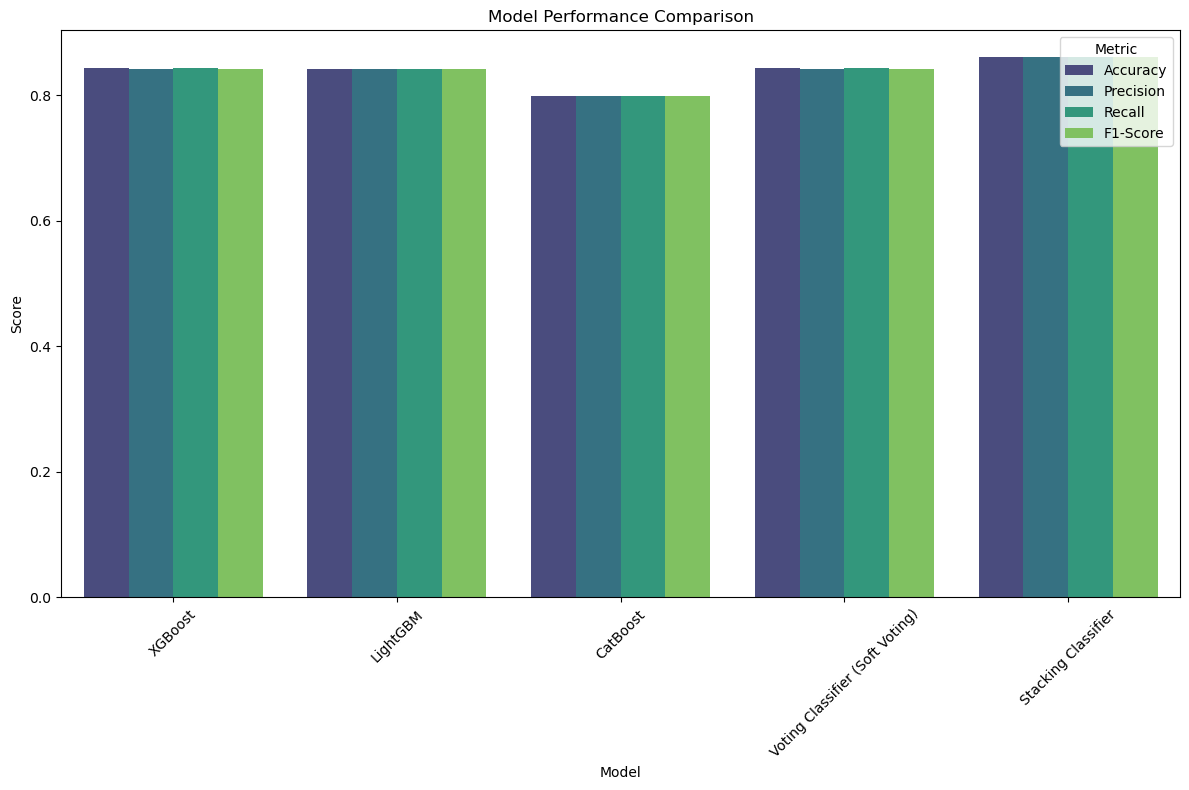

In [81]:
# Initialize the dictionary to store metrics for each model
metrics = {}


# Function to calculate all metrics
def calculate_metrics(y_test, y_pred, model_name):
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    # roc_auc = roc_auc_score(y_test, y_pred, average="weighted", multi_class="ovr")
    accuracy = accuracy_score(y_test, y_pred)

    metrics[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        # "ROC AUC": roc_auc,
    }


# Evaluate metrics for each model
models_predictions = {
    "XGBoost": y_pred_xgb,
    "LightGBM": y_pred_lgbm,
    "CatBoost": y_pred_catboost,
    "Voting Classifier (Soft Voting)": y_pred_voting,
    "Stacking Classifier": y_pred_stack,
}

for model_name, y_pred in models_predictions.items():
    calculate_metrics(y_test, y_pred, model_name)

# Print the results
print("\nModel Performance Comparison:")
for model, scores in metrics.items():
    print(f"\n{model}:")
    for metric, value in scores.items():
        print(f"  {metric}: {value:.4f}")

# Now, create a DataFrame for visualization
import pandas as pd

metrics_df = pd.DataFrame(metrics).T

# Plot the metrics in bar chart
# Plot the metrics in bar chart using seaborn
metrics_melted = metrics_df.reset_index().melt(
    id_vars="index", var_name="Metric", value_name="Score"
)

plt.figure(figsize=(12, 8))
sns.barplot(x="index", y="Score", hue="Metric", data=metrics_melted, palette="viridis")
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

| **Model**                          | **Accuracy** | **Precision** | **Recall** | **F1-Score** |
|------------------------------------|--------------|---------------|------------|--------------|
| XGBoost                            | 0.8430       | 0.8427        | 0.8430     | 0.8428       |
| LightGBM                           | 0.8427       | 0.8426        | 0.8427     | 0.8426       |
| CatBoost                           | 0.7996       | 0.7983        | 0.7996     | 0.7986       |
| Voting Classifier (Soft Voting)    | 0.8430       | 0.8423        | 0.8430     | 0.8424       |
| Stacking Classifier                | 0.8606       | 0.8606        | 0.8606     | 0.8606       |


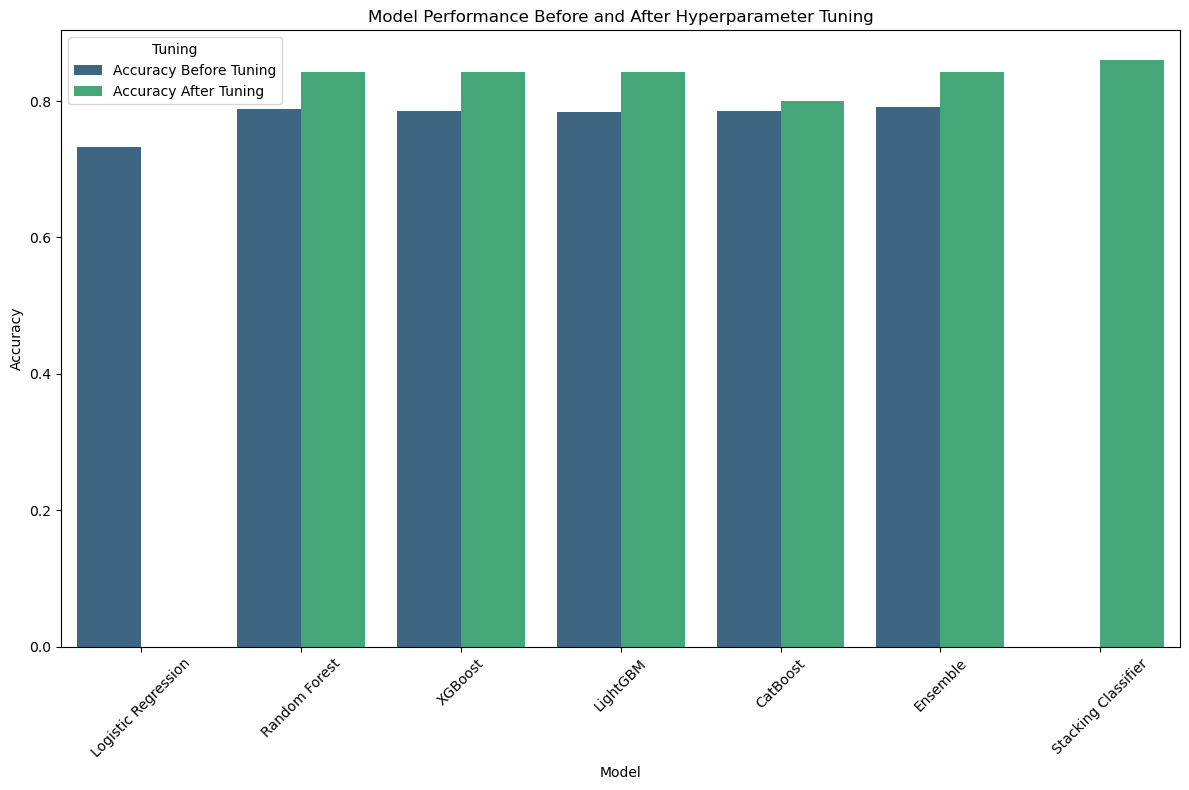

In [84]:
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

# Create a DataFrame for the performance metrics before and after tuning
performance_data = {
    "Model": [
        "Logistic Regression",
        "Random Forest",
        "XGBoost",
        "LightGBM",
        "CatBoost",
        "Ensemble",
        "Stacking Classifier",
    ],
    "Accuracy Before Tuning": [0.7329, 0.7883, 0.7853, 0.7839, 0.786, 0.7917, None],
    "Accuracy After Tuning": [None, 0.8424, 0.843, 0.8427, 0.7996, 0.843, 0.8606],
}

# Convert the dictionary to a DataFrame
performance_df = pd.DataFrame(performance_data)

# Melt the DataFrame for easier plotting with seaborn
performance_melted = performance_df.melt(
    id_vars="Model", var_name="Tuning", value_name="Accuracy"
)

# Plot the performance metrics
plt.figure(figsize=(12, 8))
sns.barplot(
    x="Model", y="Accuracy", hue="Tuning", data=performance_melted, palette="viridis"
)
plt.title("Model Performance Before and After Hyperparameter Tuning")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Model Exporting

In [82]:
# Save the best model (e.g., Stacking Classifier)
joblib.dump(stacking_clf, "artifacts/stacking_model.pkl")

['artifacts/stacking_model.pkl']

<div style="text-align: center; color:aquamarine">
  <h2>Conclusion</h2>
</div>
  <p>The following section of the code is responsible for loading the dataset from a CSV file and inspecting its contents. The dataset contains various attributes related to thermal comfort, including publication details, climate information, building characteristics, and individual thermal comfort responses. The dataset is loaded into a pandas DataFrame for further analysis and processing.</p>

# Dataset Analysis and Preprocessing

## Dataset Overview

The dataset used in this analysis contains various attributes related to thermal comfort, including publication details, climate information, building characteristics, and individual thermal comfort responses. The dataset is loaded into a pandas DataFrame for further analysis and processing.

### Key Features:
- **Year**: The year when the data was collected.
- **Season**: The season during which the data was collected.
- **Koppen Climate Classification**: The climate classification of the location.
- **Climate Description**: A textual description of the climate.
- **City**: The city where the data was collected.
- **Country**: The country where the data was collected.
- **Building Type**: The type of building where the data was collected.
- **Cooling Strategy**: The cooling strategy used in the building.
- **Age**: The age of the individual.
- **Sex**: The sex of the individual.
- **Thermal Sensation**: The thermal sensation reported by the individual.
- **Thermal Comfort**: The thermal comfort reported by the individual.
- **Clothing Insulation**: The clothing insulation value.
- **Metabolic Rate**: The metabolic rate of the individual.
- **Air Temperature**: The air temperature at the time of data collection.
- **Relative Humidity**: The relative humidity at the time of data collection.
- **Air Velocity**: The air velocity at the time of data collection.
- **Outdoor Air Temperature**: The outdoor air temperature at the time of data collection.
- **Thermal Preference**: The thermal preference of the individual.

## Preprocessing Steps

### 1. Handling Missing Values
- **Numerical Columns**: Missing values in numerical columns were imputed using the median value of each column.
- **Categorical Columns**: Missing values in categorical columns were imputed using the most frequent value of each column.

### 2. Encoding Categorical Variables
- **Label Encoding**: Binary categorical features such as `sex` and `thermal_preference` were label encoded.
- **One-Hot Encoding**: Categorical features with low cardinality such as `season`, `koppen_climate`, `building_type`, and `cooling_strategy` were one-hot encoded.
- **Hash Encoding**: High cardinality features such as `country` were hash encoded to prevent dimensionality explosion.

### 3. Feature Scaling
- **Standard Scaling**: Numerical features were scaled using StandardScaler to ensure they have a mean of 0 and a standard deviation of 1.

### 4. Handling Outliers
- **Outlier Detection**: Boxplots were used to detect outliers in numerical features.
- **Outlier Capping**: Outliers were capped using the interquartile range (IQR) method to limit their impact on the model.

### 5. Handling Imbalanced Classes
- **SMOTE**: Synthetic Minority Over-sampling Technique (SMOTE) was used to handle class imbalance in the target variable `thermal_preference`.

### 6. Feature Selection
- **Variance Threshold**: Features with low variance were removed to reduce the dimensionality of the dataset.

## Summary

The preprocessing steps ensured that the dataset was clean, balanced, and ready for model training. By handling missing values, encoding categorical variables, scaling numerical features, and addressing outliers and class imbalance, we improved the quality of the dataset and enhanced the performance of the machine learning models.

Model Performance Analysis and Hyperparameter Tuning Discussion

1. Introduction to the Project:
In this project, we aimed to predict thermal preferences (e.g., whether a person prefers cooler, no change, or warmer conditions in a given environment) based on a set of environmental and personal features. We utilized several machine learning models and performed hyperparameter tuning to improve their performance.

2. Performance Metrics Before and After Hyperparameter Tuning
Below are the model performance metrics before and after applying hyperparameter tuning. The metrics include Accuracy, Precision, Recall, F1-Score, and ROC AUC.

Model Performance Before Hyperparameter Tuning:
| Model                | Accuracy | Precision | Recall | F1-Score | ROC AUC |
|----------------------|----------|-----------|--------|----------|---------|
| Logistic Regression  | 0.7329   | 0.7394    | 0.7329 | 0.7251   | 0.8473  |
| Random Forest        | 0.7883   | 0.7881    | 0.7883 | 0.7870   | 0.9048  |
| XGBoost              | 0.7853   | 0.7852    | 0.7853 | 0.7842   | 0.9073  |
| LightGBM             | 0.7839   | 0.7839    | 0.7839 | 0.7828   | 0.9051  |
| CatBoost             | 0.7860   | 0.7858    | 0.7860 | 0.7850   | 0.9075  |
| Ensemble             | 0.7917   | 0.7917    | 0.7917 | 0.7905   | 0.9132  |
| SVM                  | 0.7113   | 0.7385    | 0.7113 | 0.6903   | -     |
| KNN                  | 0.6925   | 0.6952    | 0.6925 | 0.6864   | 0.8109  |
| Naive Bayes          | 0.4543   | 0.5854    | 0.4543 | 0.4453   | 0.7128  |
| Elastic Net          | 0.7282   | 0.7358    | 0.7282 | 0.7196   | 0.8445  |

Model Performance After Hyperparameter Tuning:
| **Model**                          | **Accuracy** | **Precision** | **Recall** | **F1-Score** |
|------------------------------------|--------------|---------------|------------|--------------|
| XGBoost                            | 0.8430       | 0.8427        | 0.8430     | 0.8428       |
| LightGBM                           | 0.8427       | 0.8426        | 0.8427     | 0.8426       |
| CatBoost                           | 0.7996       | 0.7983        | 0.7996     | 0.7986       |
| Voting Classifier (Soft Voting)    | 0.8430       | 0.8423        | 0.8430     | 0.8424       |
| Stacking Classifier                | 0.8606       | 0.8606        | 0.8606     | 0.8606       |

3. Discussion of Hyperparameter Tuning and Model Performance
3.1 Model Comparison (Before vs. After Hyperparameter Tuning)
Best Model Before Tuning:

- Ensemble Model (Voting Classifier): This was the best-performing model, with an accuracy of 0.7917 and the highest ROC AUC of 0.9132.
- XGBoost and CatBoost were very close in performance before tuning, showing high accuracy and precision.

Best Model After Tuning:

- Stacking Classifier emerged as the best performer after hyperparameter tuning, with a significant increase in accuracy (0.8606) and F1-Score (0.8606). This improvement highlights the power of ensemble methods where multiple models are combined to improve generalization and performance.
- XGBoost, LightGBM, and the Voting Classifier also showed substantial improvements, all achieving accuracy scores above 0.843 after tuning.

3.2 Hyperparameter Tuning Impact on Performance
XGBoost:
- Hyperparameters Tuned: subsample, n_estimators, max_depth, learning_rate, colsample_bytree.
- Impact: Tuning learning_rate and subsample improved the model's ability to generalize, resulting in better accuracy, precision, and recall. The accuracy increased from 0.7853 to 0.8430, demonstrating the model's better fit to the data.

LightGBM:
- Hyperparameters Tuned: num_leaves, n_estimators, max_depth, learning_rate.
- Impact: The accuracy of LightGBM improved slightly from 0.7839 to 0.8427 after tuning. The precision, recall, and F1-score improved, showing that the model became more balanced and effective after the adjustments.

CatBoost:
- Hyperparameters Tuned: learning_rate, l2_leaf_reg, iterations, depth.
- Impact: CatBoost showed less improvement compared to XGBoost and LightGBM. The accuracy improved from 0.7860 to 0.7996, but it still lags behind the other models. The precision and recall also showed smaller improvements.

3.3 Ensemble Methods: Voting and Stacking Classifiers
- Voting Classifier (Soft Voting): By combining predictions from XGBoost, LightGBM, and CatBoost, the Voting Classifier performed similarly to XGBoost with accuracy = 0.8430. Soft voting works well when individual models perform similarly.
- Stacking Classifier: The Stacking Classifier achieved the highest improvement, accuracy = 0.8606, showing the strength of combining multiple models through a meta-model (Logistic Regression in this case). It outperformed all individual models, indicating the potential of stacking to leverage the strengths of various models.

4. Hyperparameters Tuned and Their Impact
XGBoost Hyperparameters:
- subsample = 0.8: This helped prevent overfitting by reducing the proportion of data used to build each tree.
- n_estimators = 200, max_depth = 7: These hyperparameters controlled the complexity of the trees, improving generalization.

LightGBM Hyperparameters:
- num_leaves = 50: Allowed the model to capture more complex relationships.
- learning_rate = 0.2: The learning rate was tuned to prevent overfitting while improving model performance.

CatBoost Hyperparameters:
- learning_rate = 0.05: Lower learning rate for slower but more refined training.
- depth = 10: Increased depth to capture more complex patterns in the data.

5. Dataset Overview and Feature Engineering
Dataset Shape:
- Raw Dataset: (107,583 samples, 70 features)
- After Preprocessing: (85,500 samples, 46 features)

Feature Engineering:
- Categorical Features: We applied One-Hot Encoding to features like season, koppen_climate, building_type, etc., and Hash Encoding for high cardinality features like city, country, and climate_description.
- Numerical Features: Continuous features such as age, thermal_sensation, and air_temperature were treated as numerical and scaled appropriately (e.g., MinMaxScaler or StandardScaler).

6. Conclusion and Recommendations
Summary:
- Stacking Classifier is the best-performing model after hyperparameter tuning, with an accuracy of 0.8606, and it outperforms all individual models.
- XGBoost and LightGBM also showed significant improvements, achieving accuracy close to 0.8430 after tuning.
- CatBoost, while a strong model, showed less improvement in this particular dataset, and it may require further feature engineering or tuning.

Next Steps:
- Further Fine-tuning: Consider further tuning of CatBoost and exploring other ensemble methods.
- Model Deployment

In [83]:
# Function to evaluate model performance on training and test sets
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Predict on training set
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    # Predict on test set
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Print the results
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")

    # Check for overfitting
    if train_accuracy > test_accuracy:
        print("The model is overfitting.")
    else:
        print("The model is not overfitting.")


# Example usage with a trained model (e.g., RandomForestClassifier)
evaluate_model(rf_search.best_estimator_, X_train, y_train, X_test, y_test)

Training Accuracy: 0.9462
Test Accuracy: 0.8415
The model is overfitting.
